# **Marketing Campaign Analysis**

## **Problem Definition**
We need to better understand our customers. To get a beeter understanding of our customers we pla to do custoemr segmentation to better understand our customer behvior. Understanding the behavior of our customers allow more targeted marketing strategies.
### **The Context:**

 - Why is this problem important to solve?
  - A more targetd approach will help drive revenue while simultaneously lowering the cost of marketing campaigns.

### **The objective:**

 - What is the intended goal?
  - The goal is to better undaerstand out customers, drive revenue, and lower marketing costs.

### **The key questions:**

 - What are the different segments?
 - What are the different characteristics of each segment?
 - What are some possible marketing strategies for each segment?

### **The problem formulation**:

- What is it that we are trying to solve using data science?
 - To use the best model to segment the customer data.
 - Using the segmentations to uncover behavioir and characteristics of the our customers.


------------------------------
## **Data Dictionary**
------------------------------

The dataset contains the following features:

1. ID: Unique ID of each customer
2. Year_Birth: Customer’s year of birth
3. Education: Customer's level of education
4. Marital_Status: Customer's marital status
5. Kidhome: Number of small children in customer's household
6. Teenhome: Number of teenagers in customer's household
7. Income: Customer's yearly household income in USD
8. Recency: Number of days since the last purchase
9. Dt_Customer: Date of customer's enrollment with the company
10. MntFishProducts: The amount spent on fish products in the last 2 years
11. MntMeatProducts: The amount spent on meat products in the last 2 years
12. MntFruits: The amount spent on fruits products in the last 2 years
13. MntSweetProducts: Amount spent on sweet products in the last 2 years
14. MntWines: The amount spent on wine products in the last 2 years
15. MntGoldProds: The amount spent on gold products in the last 2 years
16. NumDealsPurchases: Number of purchases made with discount
17. NumCatalogPurchases: Number of purchases made using a catalog (buying goods to be shipped through the mail)
18. NumStorePurchases: Number of purchases made directly in stores
19. NumWebPurchases: Number of purchases made through the company's website
20. NumWebVisitsMonth: Number of visits to the company's website in the last month
21. AcceptedCmp1: 1 if customer accepted the offer in the first campaign, 0 otherwise
22. AcceptedCmp2: 1 if customer accepted the offer in the second campaign, 0 otherwise
23. AcceptedCmp3: 1 if customer accepted the offer in the third campaign, 0 otherwise
24. AcceptedCmp4: 1 if customer accepted the offer in the fourth campaign, 0 otherwise
25. AcceptedCmp5: 1 if customer accepted the offer in the fifth campaign, 0 otherwise
26. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
27. Complain: 1 If the customer complained in the last 2 years, 0 otherwise

**Note:** You can assume that the data is collected in the year 2016.

## **Import the necessary libraries and load the data**

In [202]:
# import pandas
import pandas as pd
#import numpy
import numpy as np
# data visulization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values
- Drop the column which has no null values

In [203]:
# Connect Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [204]:
# Read in data
data = pd.read_csv('/content/drive/MyDrive/Capstone_Marketing Campaign Customer Segmentation/marketing_campaign+%284%29.csv')

In [205]:
# Make sure data is loaded
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0             0         0         1  
1             0             0             0             0         0         0  
2             0             0             0             0         0         0  
3             0             0             0             0         0         0  
4             0             0             0             0         0         0

In [206]:
# Get the shape of the data
data.shape

(2240, 27)

In [207]:
# get data set information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [208]:
# find duplicates
data.duplicated().sum()

0

In [209]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [210]:
# make a copy  of the data
df = data.copy()

In [211]:
df.head(20)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   5524        1957  Graduation         Single  58138.0        0         0   
1   2174        1954  Graduation         Single  46344.0        1         1   
2   4141        1965  Graduation       Together  71613.0        0         0   
3   6182        1984  Graduation       Together  26646.0        1         0   
4   5324        1981         PhD        Married  58293.0        1         0   
5   7446        1967      Master       Together  62513.0        0         1   
6    965        1971  Graduation       Divorced  55635.0        0         1   
7   6177        1985         PhD        Married  33454.0        1         0   
8   4855        1974         PhD       Together  30351.0        1         0   
9   5899        1950         PhD       Together   5648.0        1         1   
10  1994        1983  Graduation        Married      NaN        1         0   
11   387        1976       Basic        Married   7500.0        0         0   
12  2125        1959  Graduation       Divorced  63033.0        0         0   
13  8180        1952      Master       Divorced  59354.0        1         1   
14  2569        1987  Graduation        Married  17323.0        0         0   
15  2114        1946         PhD         Single  82800.0        0         0   
16  9736        1980  Graduation        Married  41850.0        1         1   
17  4939        1946  Graduation       Together  37760.0        0         0   
18  6565        1949      Master        Married  76995.0        0         1   
19  2278        1985    2n Cycle         Single  33812.0        1         0   

   Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0   04-09-2012       58       635         88              546   
1   08-03-2014       38        11          1                6   
2   21-08-2013       26       426         49              127   
3   10-02-2014       26        11          4               20   
4   19-01-2014       94       173         43              118   
5   09-09-2013       16       520         42               98   
6   13-11-2012       34       235         65              164   
7   08-05-2013       32        76         10               56   
8   06-06-2013       19        14          0               24   
9   13-03-2014       68        28          0                6   
10  15-11-2013       11         5          5                6   
11  13-11-2012       59         6         16               11   
12  15-11-2013       82       194         61              480   
13  15-11-2013       53       233          2               53   
14  10-10-2012       38         3         14               17   
15  24-11-2012       23      1006         22              115   
16  24-12-2012       51        53          5               19   
17  31-08-2012       20        84          5               38   
18  28-03-2013       91      1012         80              498   
19  03-11-2012       86         4         17               19   

    MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0               172                88            88                  3   
1                 2                 1             6                  2   
2               111                21            42                  1   
3                10                 3             5                  2   
4                46                27            15                  5   
5                 0                42            14                  2   
6                50                49            27                  4   
7                 3                 1            23                  2   
8                 3                 3             2                  1   
9                 1                 1            13                  1   
10                0                 2             1                  1   
11               11                 1            16                  1   
12              22

In [212]:
# drop rows with missing data
df = df.dropna(axis=0, how='any')

In [213]:
df.head(20)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   5524        1957  Graduation         Single  58138.0        0         0   
1   2174        1954  Graduation         Single  46344.0        1         1   
2   4141        1965  Graduation       Together  71613.0        0         0   
3   6182        1984  Graduation       Together  26646.0        1         0   
4   5324        1981         PhD        Married  58293.0        1         0   
5   7446        1967      Master       Together  62513.0        0         1   
6    965        1971  Graduation       Divorced  55635.0        0         1   
7   6177        1985         PhD        Married  33454.0        1         0   
8   4855        1974         PhD       Together  30351.0        1         0   
9   5899        1950         PhD       Together   5648.0        1         1   
11   387        1976       Basic        Married   7500.0        0         0   
12  2125        1959  Graduation       Divorced  63033.0        0         0   
13  8180        1952      Master       Divorced  59354.0        1         1   
14  2569        1987  Graduation        Married  17323.0        0         0   
15  2114        1946         PhD         Single  82800.0        0         0   
16  9736        1980  Graduation        Married  41850.0        1         1   
17  4939        1946  Graduation       Together  37760.0        0         0   
18  6565        1949      Master        Married  76995.0        0         1   
19  2278        1985    2n Cycle         Single  33812.0        1         0   
20  9360        1982  Graduation        Married  37040.0        0         0   

   Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0   04-09-2012       58       635         88              546   
1   08-03-2014       38        11          1                6   
2   21-08-2013       26       426         49              127   
3   10-02-2014       26        11          4               20   
4   19-01-2014       94       173         43              118   
5   09-09-2013       16       520         42               98   
6   13-11-2012       34       235         65              164   
7   08-05-2013       32        76         10               56   
8   06-06-2013       19        14          0               24   
9   13-03-2014       68        28          0                6   
11  13-11-2012       59         6         16               11   
12  15-11-2013       82       194         61              480   
13  15-11-2013       53       233          2               53   
14  10-10-2012       38         3         14               17   
15  24-11-2012       23      1006         22              115   
16  24-12-2012       51        53          5               19   
17  31-08-2012       20        84          5               38   
18  28-03-2013       91      1012         80              498   
19  03-11-2012       86         4         17               19   
20  08-08-2012       41        86          2               73   

    MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0               172                88            88                  3   
1                 2                 1             6                  2   
2               111                21            42                  1   
3                10                 3             5                  2   
4                46                27            15                  5   
5                 0                42            14                  2   
6                50                49            27                  4   
7                 3                 1            23                  2   
8                 3                 3             2                  1   
9                 1                 1            13                  1   
11               11                 1            16                  1   
12              225               112            30                  1   
13                

In [214]:
# Check to see inf rows were removed
df.shape

(2216, 27)

#### **Observations and Insights from the Data overview: _____**
Income had 24 rows with missing values, so those rows were removed

## **Exploratory Data Analysis (EDA)**


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Are all categories different from each other or can we combine some categories? Is 2n Cycle different from Master?
4. There are 8 categories in Marital_Status with some categories having very low count of less than 5. Can we combine these categories with other categories?

In [215]:
# Get descriptive statistics
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2216.000000  2216.000000    2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.820397   52247.251354     0.441787     0.505415   
std     3249.376275    11.985554   25173.076661     0.536896     0.544181   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8421.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2216.000000  2216.000000  2216.000000      2216.000000   
mean     49.012635   305.091606    26.356047       166.995939   
std      28.948352   337.327920    39.793917       224.283273   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    24.000000     2.000000        16.000000   
50%      49.000000   174.500000     8.000000        68.000000   
75%      74.000000   505.000000    33.000000       232.250000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2216.000000       2216.000000   2216.000000        2216.000000   
mean         37.637635         27.028881     43.965253           2.323556   
std          54.752082         41.072046     51.815414           1.923716   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.500000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        262.000000    321.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2216.000000          2216.000000        2216.000000   
mean          4.085289             2.671029           5.800993   
std           2.740951             2.926734           3.250785   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2216.000000   2216.000000   2216.000000   2216.000000   
mean            5.319043      0.073556      0.074007      0.073105   
std             2.425359      0.261106      0.261842      0.260367   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  
count   2216.000000   2216.000000  2216.000000  2216.000000  
mean       0.064079      0.013087     0.009477     0.150271  
std        0.244950      0.113672     0.096907     0.357417  
min        0.000000      0.000000     0.000000     0.000000  
25%        0.000000      0.000000     0.000000     0.000000  
50%        0.000000      0.000000     0.000000     0.000000  
75%        0.000000      0.000000     0.000000     0.000000  
max        1.000000      1.000000     1.000000     1.000000

In [216]:
df['Kidhome'].value_counts()

0    1283
1     887
2      46
Name: Kidhome, dtype: int64

In [217]:
df['Teenhome'].value_counts()

0    1147
1    1018
2      51
Name: Teenhome, dtype: int64

In [218]:
df['Recency'].value_counts()

56    37
30    32
54    32
46    31
92    30
65    30
71    29
3     29
29    29
49    29
0     28
51    28
2     28
24    28
48    28
81    27
72    27
80    27
27    27
23    27
13    27
86    26
4     26
10    26
94    26
74    26
78    26
40    25
38    25
87    25
11    25
8     25
77    25
68    25
1     24
9     24
12    24
19    24
37    24
25    24
34    23
57    23
63    23
96    23
28    23
64    23
84    23
98    22
60    22
50    22
21    21
6     21
32    21
83    21
20    21
93    21
16    21
26    21
52    21
61    21
73    20
90    20
42    20
43    20
89    20
55    20
82    20
97    20
18    19
14    19
53    19
76    19
17    19
62    19
47    19
91    18
36    18
39    18
95    18
70    18
31    18
85    18
67    17
99    17
79    17
33    17
35    17
88    16
45    16
15    16
75    16
66    16
58    15
5     15
69    15
41    15
59    14
22    13
7     12
44    11
Name: Recency, dtype: int64

In [219]:
df['Recency'].describe()

count    2216.000000
mean       49.012635
std        28.948352
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

In [220]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [221]:
# merge Alone with single
df['Marital_Status'] = df['Marital_Status'].replace("Alone","Single")

In [222]:
# merge check
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      474
Divorced    232
Widow        76
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [223]:
# Combine Absurd and Yolo into "Misc"
df['Marital_Status'] = df['Marital_Status'].replace("Absurd","Misc")
df['Marital_Status'] = df['Marital_Status'].replace("YOLO","Misc")
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      474
Divorced    232
Widow        76
Misc          4
Name: Marital_Status, dtype: int64

In [224]:
# Merge 2b Cycle with master
df['Education'] = df['Education'].replace("2n Cycle","Master")
df['Education'].value_counts()

Graduation    1116
Master         565
PhD            481
Basic           54
Name: Education, dtype: int64

** Observations **
1. More money is spent on wine products than anything.
2. On average ther is about 50 days from the last purchase
3. Small children and teens could be combined, but teens tend to eat more than small children. It would be nice to see how this affects customer behavior.
4. Otherwise all of the catergories seem to be uunique and can stand on their own.
5. For Marital_Status, Alone and single could be combined. I'm not sure what Absurd or YOLO would nmean in this context.
6. Combined Absurd and Yolo

### **Univariate Analysis on Numerical and Categorical data**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

- Plot histogram and box plot for different numerical features and understand how the data looks like.
- Explore the categorical variables like Education, Kidhome, Teenhome, Complain.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. How does the distribution of Income variable vary across the dataset?
2. The histogram and the box plot are showing some extreme value on the right side of the distribution of the 'Income' feature. Can we consider them as outliers and remove or should we analyze these extreme values?
3. There are only a few rows with extreme values for the Income variable. Is that enough information to treat (or not to treat) them? At what percentile the upper whisker lies?


Text(0.5, 1.0, 'Distribution of Income')

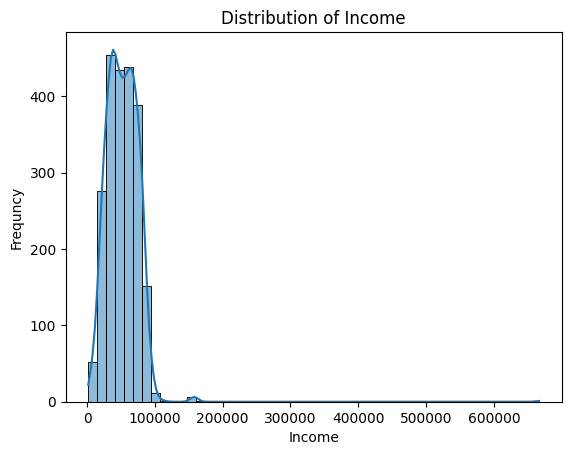

In [225]:
sns.histplot(df['Income'], kde= True, bins= 50)
plt.xlabel('Income')
plt.ylabel('Frequncy')
plt.title('Distribution of Income')

<Axes: xlabel='Income'>

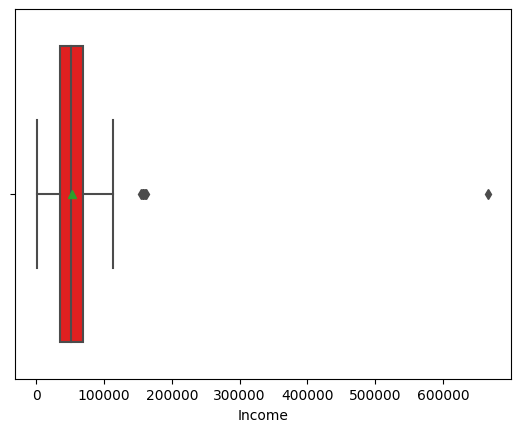

In [226]:
# boxplot of Income that shows median as well mean
sns.boxplot(df, x= 'Income', showmeans= True, color= 'red')

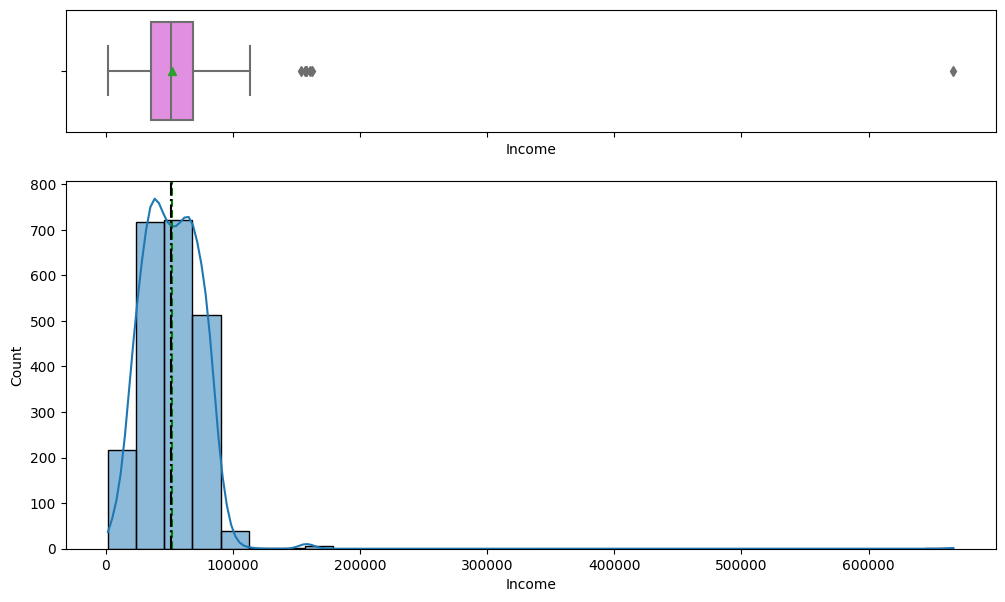

In [227]:
# showing boxplot and histogram together using subplot
fig, ax= plt.subplots(2,1, sharex= True, gridspec_kw={'height_ratios': (1,3)}, figsize= (12,7))
sns.boxplot(df, x= 'Income', showmeans= True, color= 'violet', ax= ax[0])
sns.histplot(df, x= 'Income', bins= 30, kde= True, ax=ax[1])
ax[1].axvline(df['Income'].mean(), linestyle= "--", color= 'green')
ax[1].axvline(df['Income'].median(), linestyle= '-.', color= 'black')

In [228]:
# function for to show hitogram and boxplot
# this can be used on any of the numerical variables
def histogram_boxplot(df, feature):
  fig, ax= plt.subplots(2,1, sharex= True, gridspec_kw={'height_ratios': (1,3)}, figsize= (12,7))
  sns.boxplot(df, x= feature, showmeans= True, color= 'violet', ax= ax[0])
  sns.histplot(df, x= feature, bins= 30, kde= True, ax=ax[1])
  ax[1].axvline(df[feature].mean(), linestyle= "--", color= 'green')
  ax[1].axvline(df[feature].median(), linestyle= '-.', color= 'black')

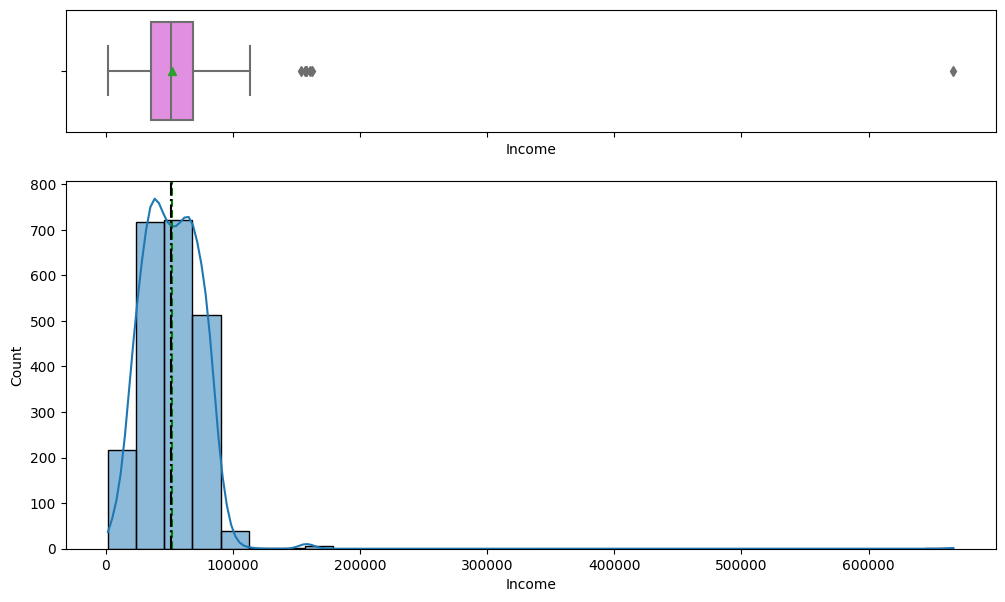

In [229]:
histogram_boxplot(df, 'Income')

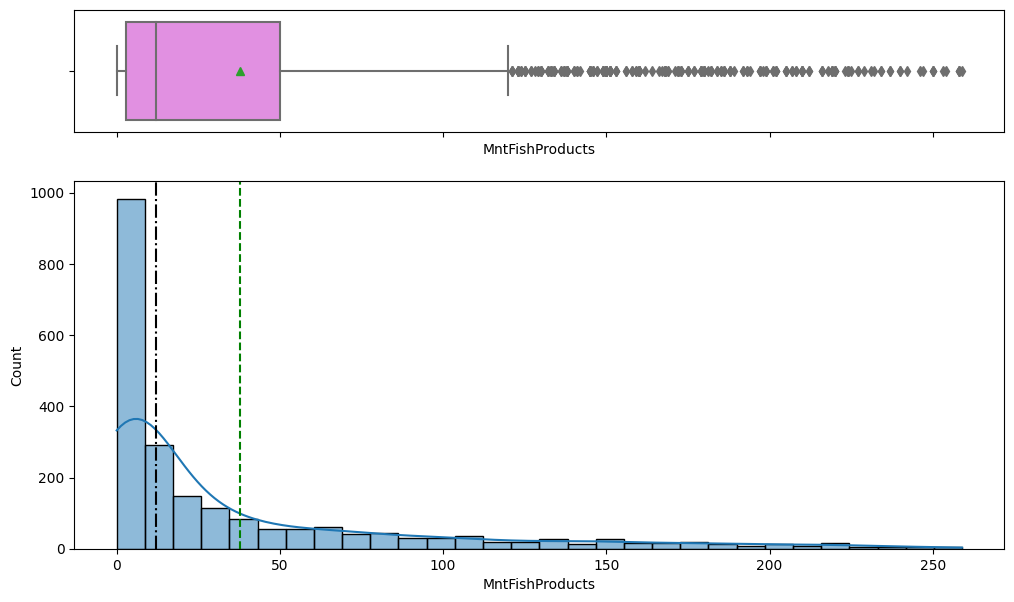

In [230]:
histogram_boxplot(df, 'MntFishProducts')

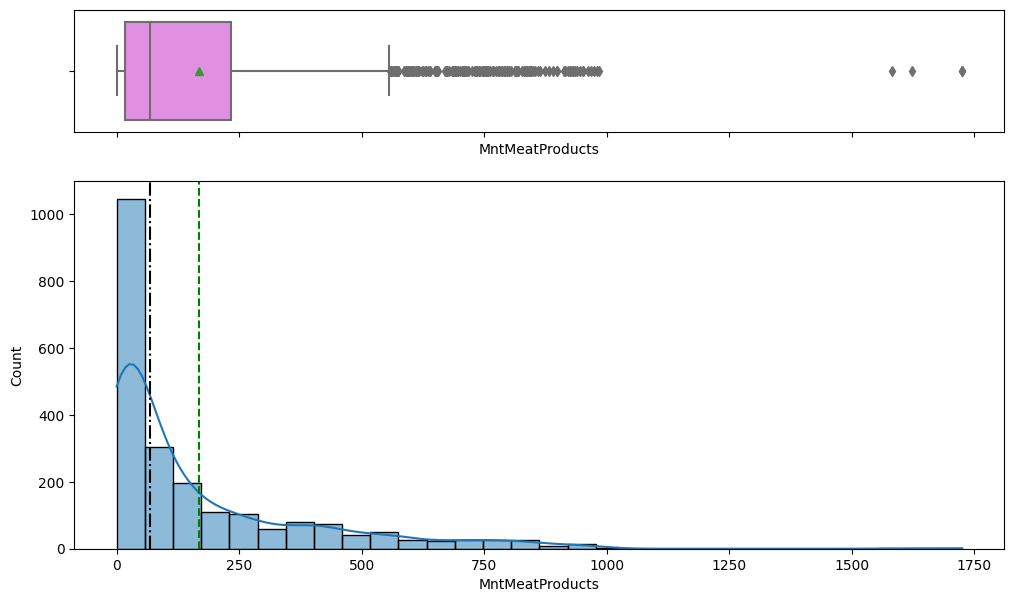

In [231]:
histogram_boxplot(df,'MntMeatProducts')

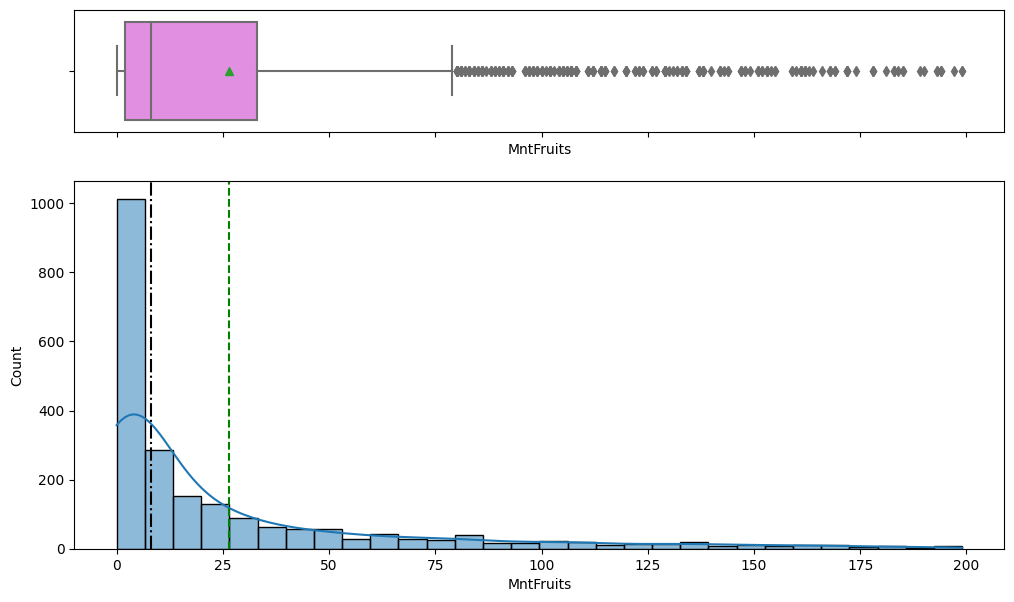

In [232]:
histogram_boxplot(df, 'MntFruits')

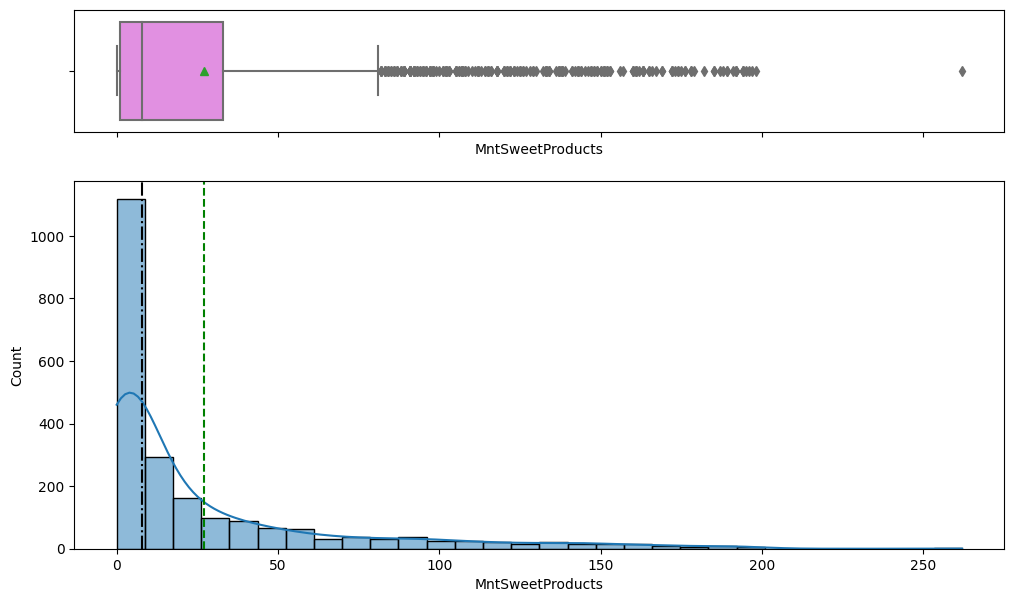

In [233]:
histogram_boxplot(df,'MntSweetProducts')

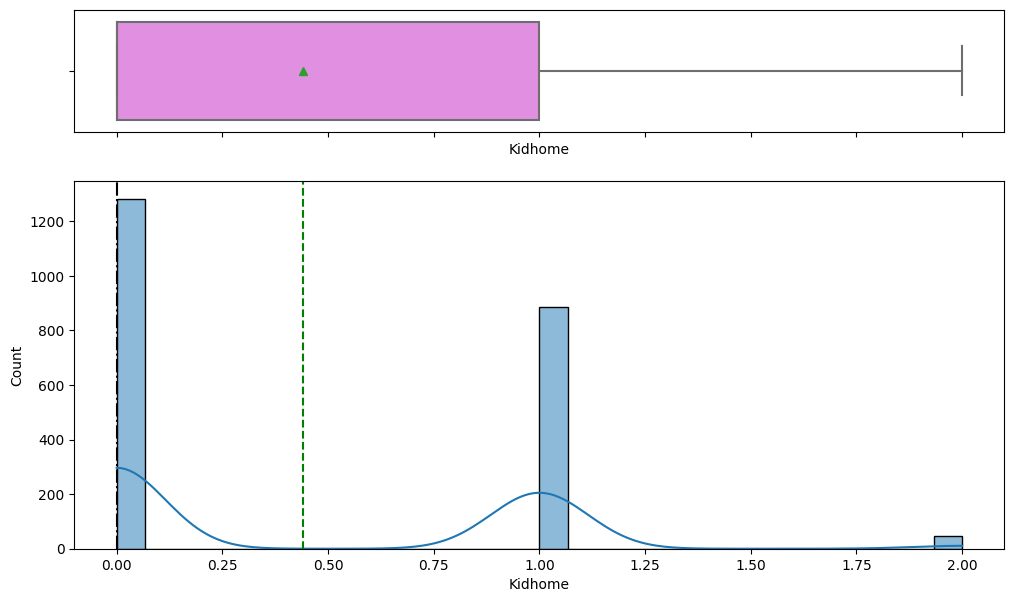

In [234]:
histogram_boxplot(df, 'Kidhome')

**Think About It:**

- Can we extract the age of each customer and create a new feature?
- Can we find the total kids and teens in the home?
- Can we find out how many members each family has?
- Can we find the total amount spent by the customers on various products?
- Can we find out how long the customer has been with the company?
- Can we find out how many offers the customers have accepted?
- Can we find out amount spent per purchase?



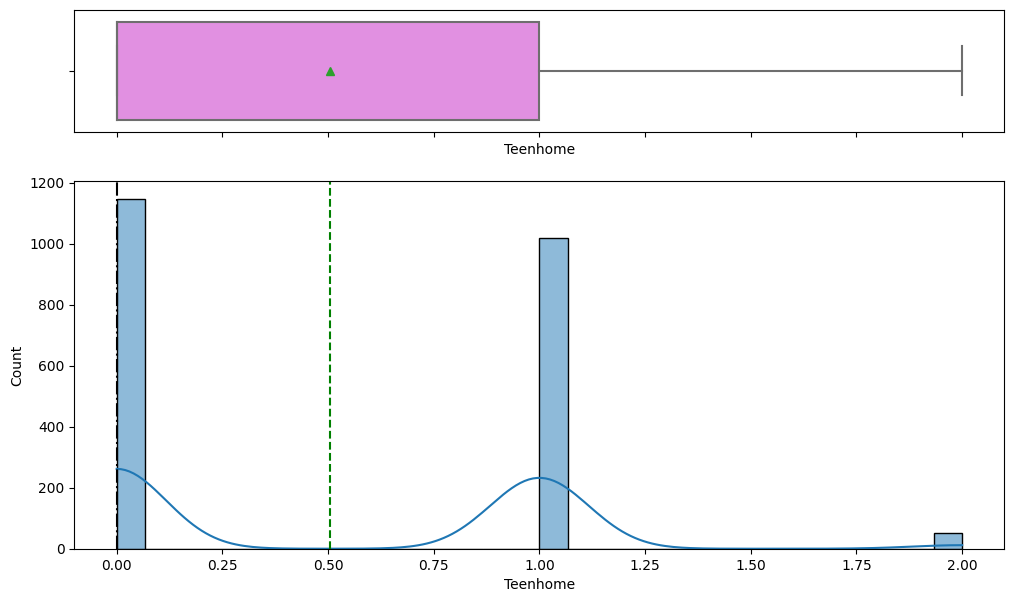

In [235]:
histogram_boxplot(df, 'Teenhome')

<Axes: xlabel='Income', ylabel='Count'>

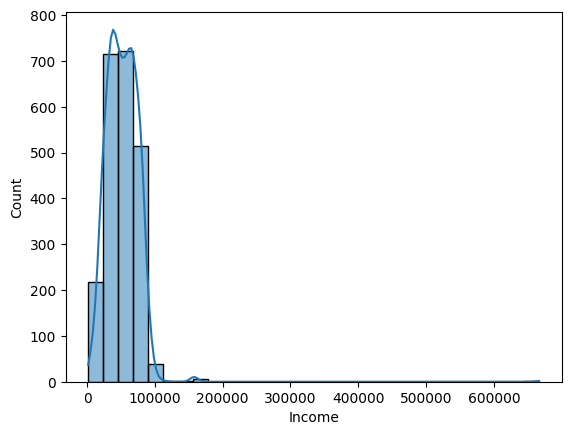

In [236]:
# histogram  of Income
sns.histplot(df, x= 'Income', bins= 30, kde= True)

In [237]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

### **Feature Engineering and Data Processing**

In this section, we will first prepare our dataset for analysis.
- Imputing missing values

In [238]:
#check skewness
df['Income'].skew()

6.7634873728111184

In [239]:
# Check for missing values
df['Income'].isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Name: Income, Length: 2216, dtype: bool>

### **Bivariate Analysis**

 - Analyze different categorical and numerical variables and check how different variables are related to each other.
 - Check the relationship of numerical variables with categorical variables.

In [240]:
df.head(1)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0             0         0         1

Text(0.5, 1.0, 'Income Distribution by Education')

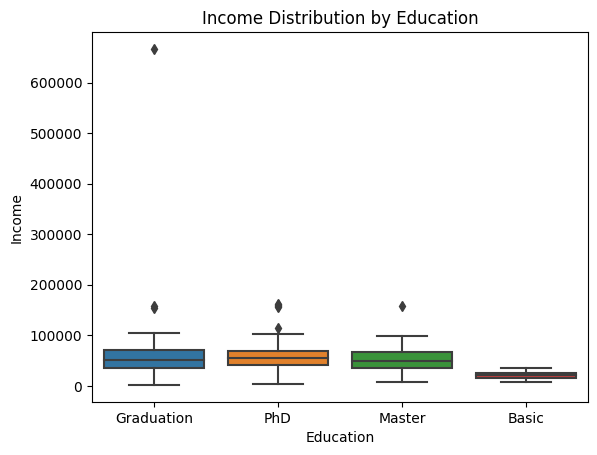

In [241]:
sns.boxplot(df, x= 'Education', y= 'Income')
plt.title('Income Distribution by Education')

Text(0.5, 1.0, 'Income Distribution by Marital Status')

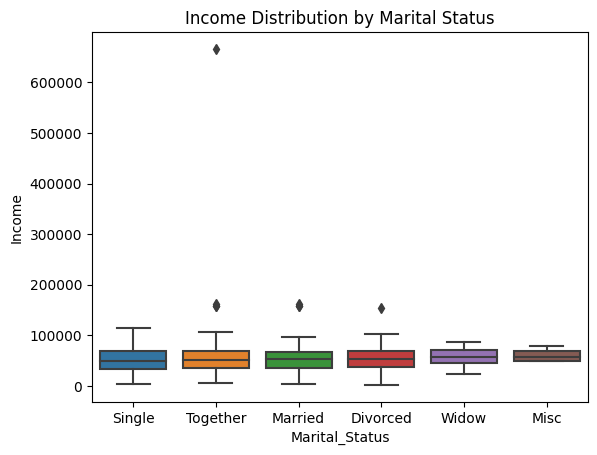

In [242]:
sns.boxplot(df, x= 'Marital_Status', y= 'Income')
plt.title('Income Distribution by Marital Status')

In [243]:
# the correlation of al the variables
df.corr()

<ipython-input-243-877d6f5c9810>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



ID  Year_Birth    Income   Kidhome  Teenhome  \
ID                   1.000000    0.002355  0.013095  0.001736 -0.003030   
Year_Birth           0.002355    1.000000 -0.161791  0.233615 -0.350791   
Income               0.013095   -0.161791  1.000000 -0.428669  0.019133   
Kidhome              0.001736    0.233615 -0.428669  1.000000 -0.039869   
Teenhome            -0.003030   -0.350791  0.019133 -0.039869  1.000000   
Recency             -0.044376   -0.016295 -0.003970  0.011492  0.013838   
MntWines            -0.021084   -0.159451  0.578650 -0.497336  0.003747   
MntFruits            0.007326   -0.017747  0.430842 -0.373396 -0.176558   
MntMeatProducts     -0.005902   -0.033697  0.584633 -0.439261 -0.261122   
MntFishProducts     -0.023992   -0.040425  0.438871 -0.388884 -0.205242   
MntSweetProducts    -0.005936   -0.020204  0.440744 -0.378026 -0.163056   
MntGoldProds        -0.011172   -0.064208  0.325916 -0.355029 -0.019887   
NumDealsPurchases   -0.040612   -0.058668 -0.083101  0.216913  0.386246   
NumWebPurchases     -0.018476   -0.153051  0.387878 -0.371977  0.162077   
NumCatalogPurchases -0.002274   -0.121764  0.589162 -0.504501 -0.112692   
NumStorePurchases   -0.013070   -0.127891  0.529362 -0.501349  0.049737   
NumWebVisitsMonth   -0.007794    0.123904 -0.553088  0.447477  0.131240   
AcceptedCmp3        -0.035890    0.061784 -0.016174  0.016066 -0.042522   
AcceptedCmp4        -0.023933   -0.066109  0.184400 -0.162026  0.038376   
AcceptedCmp5        -0.007064    0.010575  0.335943 -0.205305 -0.190791   
AcceptedCmp1        -0.018219   -0.009611  0.276820 -0.174163 -0.144855   
AcceptedCmp2        -0.012718   -0.013849  0.082880 -0.079980 -0.012094   
Complain             0.034154   -0.030407 -0.027225  0.040978  0.003307   
Response            -0.021491    0.023692  0.133047 -0.077909 -0.153901   

                      Recency  MntWines  MntFruits  MntMeatProducts  \
ID                  -0.044376 -0.021084   0.007326        -0.005902   
Year_Birth          -0.016295 -0.159451  -0.017747        -0.033697   
Income              -0.003970  0.578650   0.430842         0.584633   
Kidhome              0.011492 -0.497336  -0.373396        -0.439261   
Teenhome             0.013838  0.003747  -0.176558        -0.261122   
Recency              1.000000  0.015721  -0.005844         0.022518   
MntWines             0.015721  1.000000   0.387024         0.568860   
MntFruits           -0.005844  0.387024   1.000000         0.547822   
MntMeatProducts      0.022518  0.568860   0.547822         1.000000   
MntFishProducts      0.000551  0.397721   0.593431         0.573574   
MntSweetProducts     0.025110  0.390326   0.571606         0.535136   
MntGoldProds         0.017663  0.392731   0.396487         0.359446   
NumDealsPurchases    0.002115  0.008886  -0.134512        -0.121308   
NumWebPurchases     -0.005641  0.553786   0.302039         0.307090   
NumCatalogPurchases  0.024081  0.634753   0.486263         0.734127   
NumStorePurchases   -0.000434  0.640012   0.458491         0.486006   
NumWebVisitsMonth   -0.018564 -0.321978  -0.418729        -0.539484   
AcceptedCmp3        -0.032257  0.061463   0.014424         0.018438   
AcceptedCmp4         0.017566  0.373143   0.006396         0.091618   
AcceptedCmp5        -0.000482  0.473550   0.212871         0.376867   
AcceptedCmp1        -0.021061  0.351417   0.191816         0.313076   
AcceptedCmp2        -0.007596  0.211347  -0.010313         0.032727   
Complain             0.013637 -0.039470  -0.005324        -0.023782   
Response            -0.199766  0.246299   0.122443         0.237746   

                     MntFishProducts  MntSweetProducts  MntGoldProds  \
ID                         -0.023992         -0.005936     -0.011172   
Year_Birth                 -0.040425         -0.020204     -0.064208   
Income                      0.438871          0.440744      0.325916   
Kidhome                    -0.388884         -0.378026     -0.355029   
Teenhome       

<ipython-input-244-77181b64135b>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

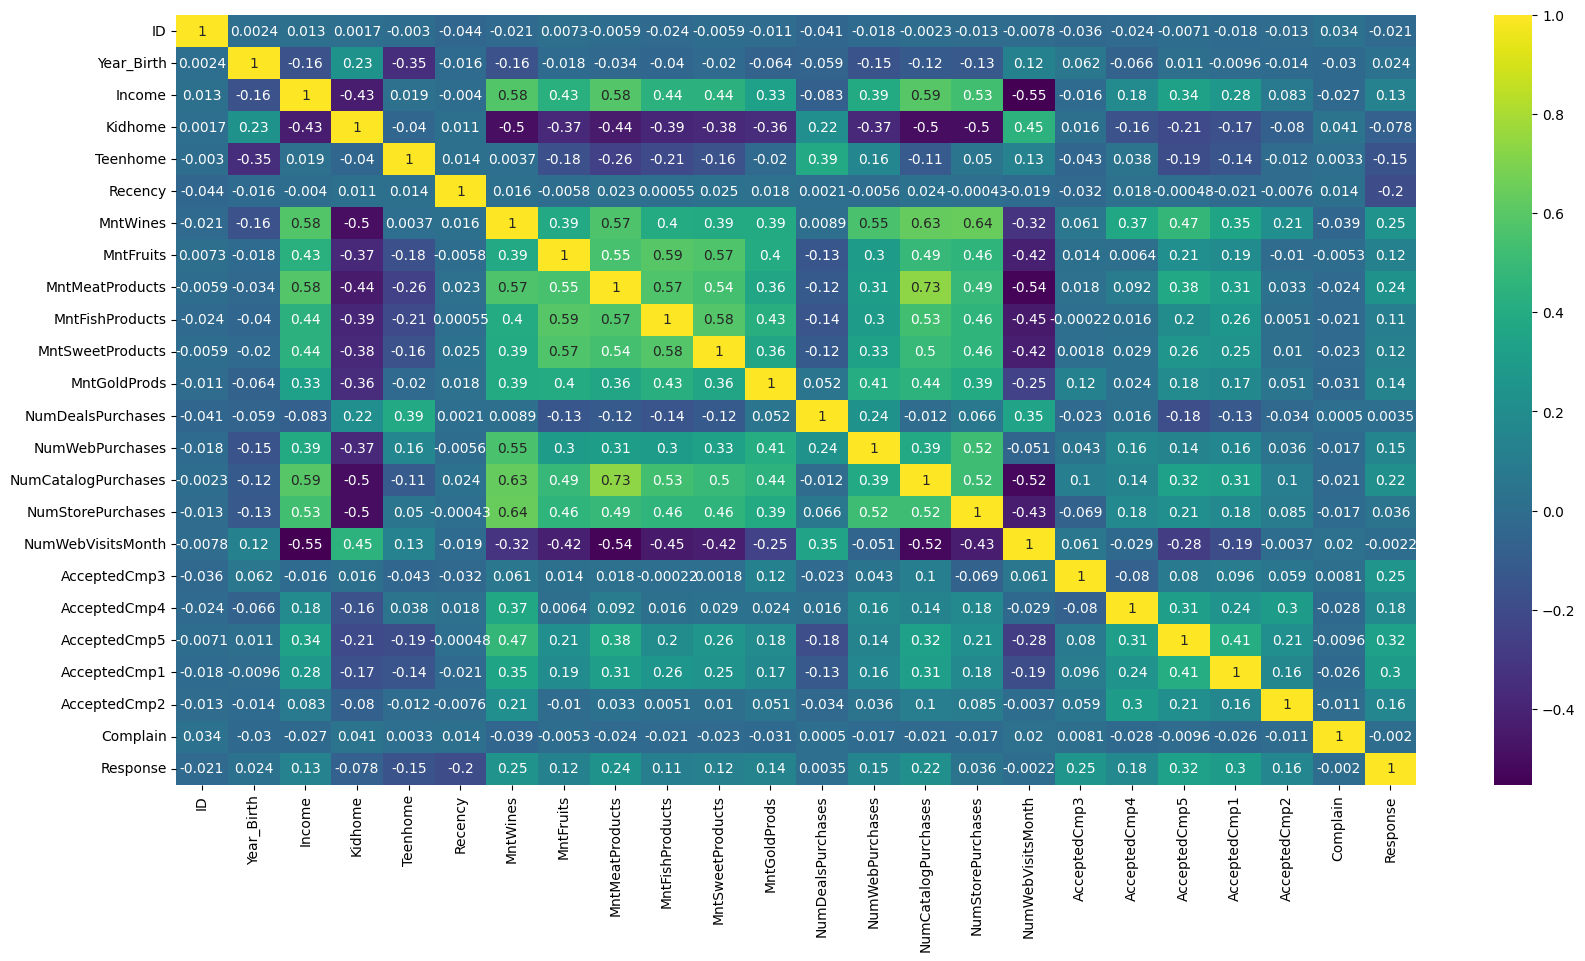

In [244]:
# Checking correlation with heatmap
plt.figure(figsize= (20, 10))
sns.heatmap(df.corr(), annot= True, cmap= 'viridis')

In [245]:
df.head(1)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0             0         0         1

<Axes: xlabel='Kidhome', ylabel='Income'>

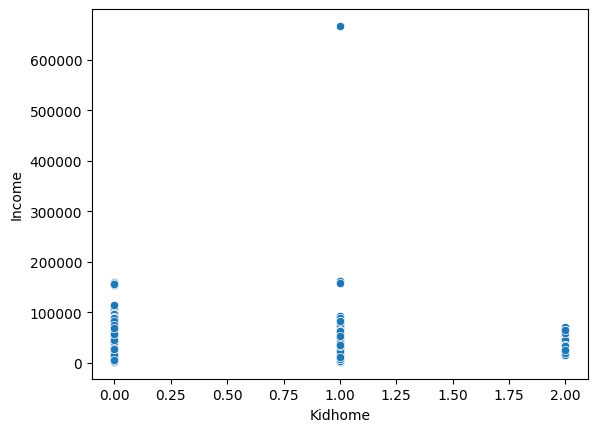

In [246]:
# get scatter plot of. numeric variables
sns.scatterplot(df, x= 'Kidhome', y= 'Income')

<Axes: xlabel='Teenhome', ylabel='Income'>

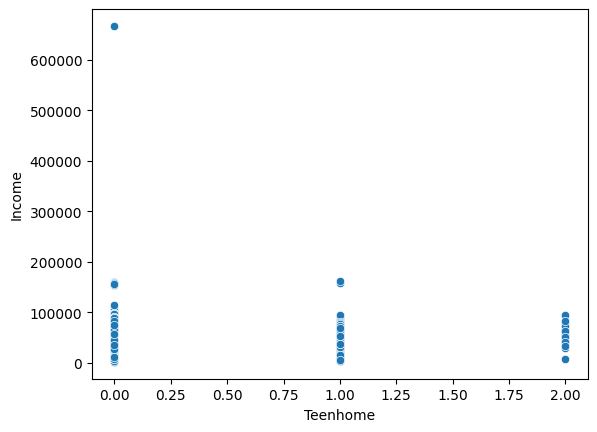

In [247]:
# get scatter plot of. numeric variables
sns.scatterplot(df, x= 'Teenhome', y= 'Income')

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

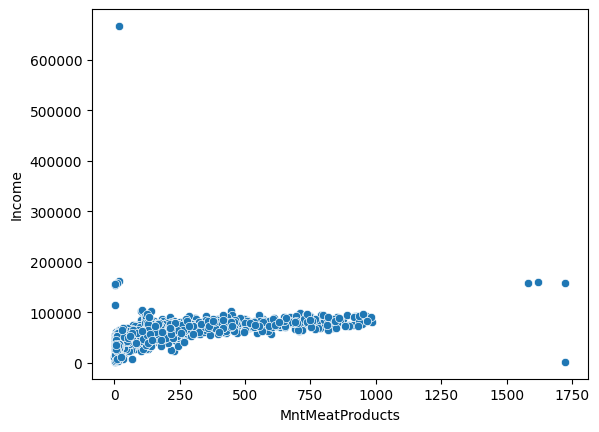

In [249]:
scatter_plt(df, x= 'MntMeatProducts', y= 'Income')

In [250]:
# Function for scatter plot of numeric variables
def scatter_plt(df, x, y):
  sns.scatterplot(df, x= x, y= y)


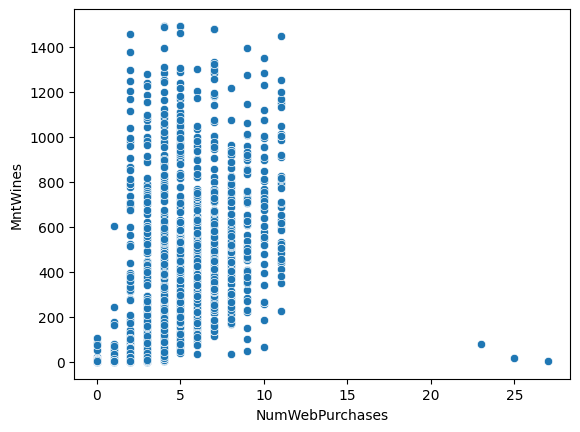

In [251]:
scatter_plt(df, x= 'NumWebPurchases', y= 'MntWines')

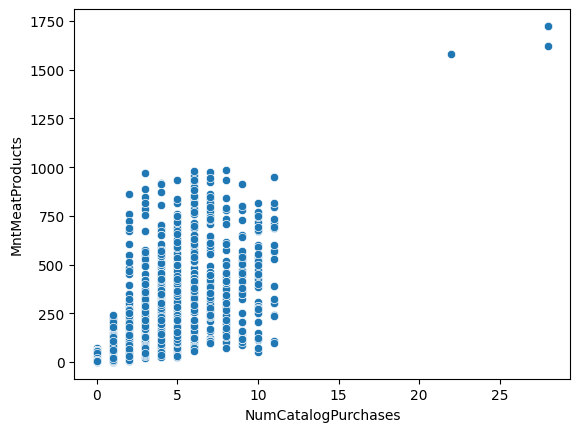

In [252]:
scatter_plt(df, x= 'NumCatalogPurchases', y= 'MntMeatProducts')

In [253]:
df.head(1)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0             0         0         1

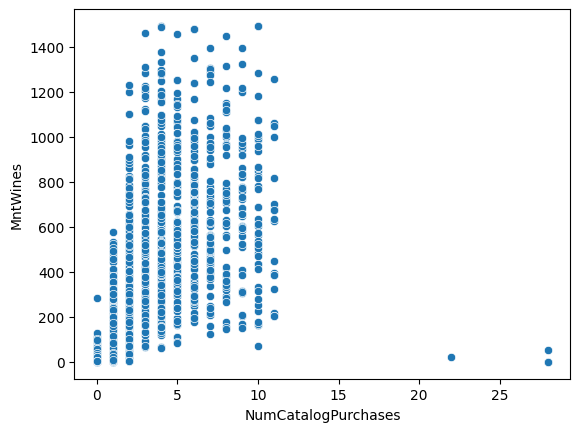

In [254]:
scatter_plt(df, x= 'NumCatalogPurchases', y= 'MntWines')

In [255]:
df.head(1)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0             0         0         1

<Axes: xlabel='Marital_Status', ylabel='Teenhome'>

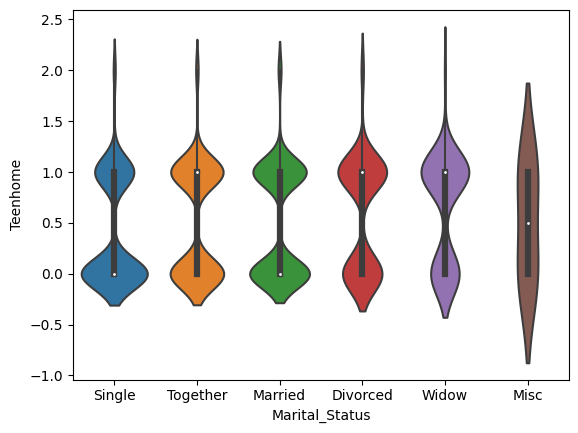

In [256]:
# violiin Plots
sns.violinplot(df, x='Marital_Status', y='Teenhome')


<Axes: xlabel='Education', ylabel='Teenhome'>

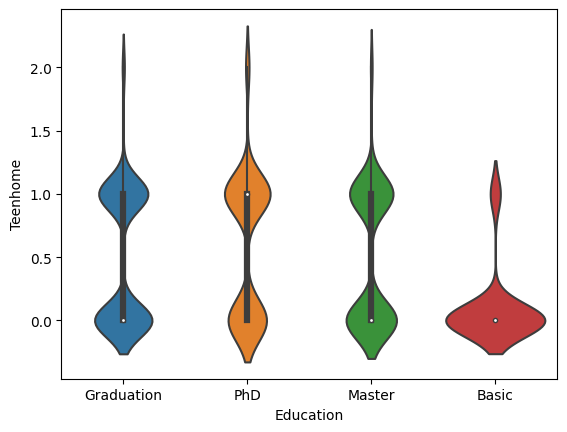

In [257]:
sns.violinplot(df, x='Education', y='Teenhome', kde= True)


In [258]:
 pd.crosstab(df['Education'], df['Marital_Status'])


Marital_Status  Divorced  Married  Misc  Single  Together  Widow
Education                                                       
Basic                  1       20     0      18        14      1
Graduation           119      429     1     247       285     35
Master                60      218     1     112       158     16
PhD                   52      190     2      97       116     24

<Axes: xlabel='Marital_Status', ylabel='count'>

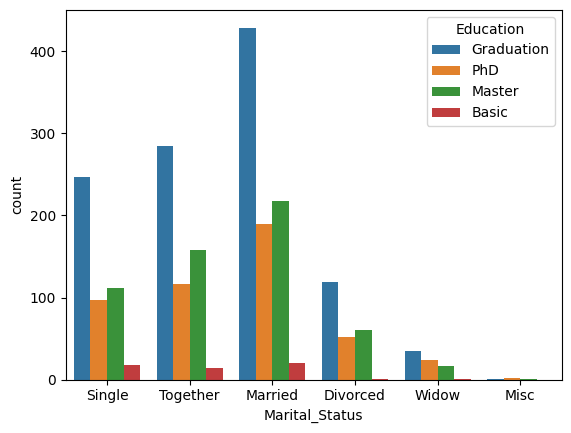

In [259]:
sns.countplot(df ,x='Marital_Status', hue='Education')


<Axes: xlabel='Education', ylabel='count'>

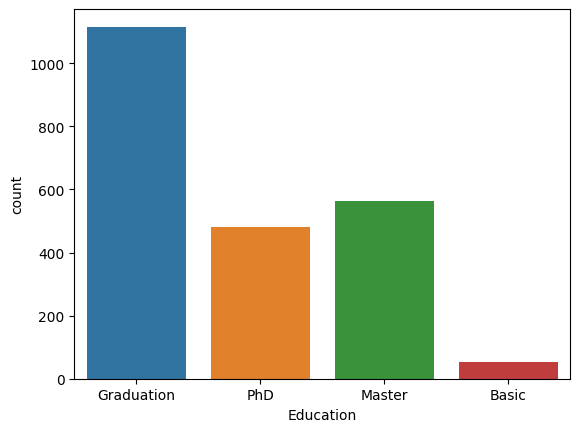

In [261]:
sns.countplot(df, x= 'Education')

<Axes: xlabel='Marital_Status', ylabel='count'>

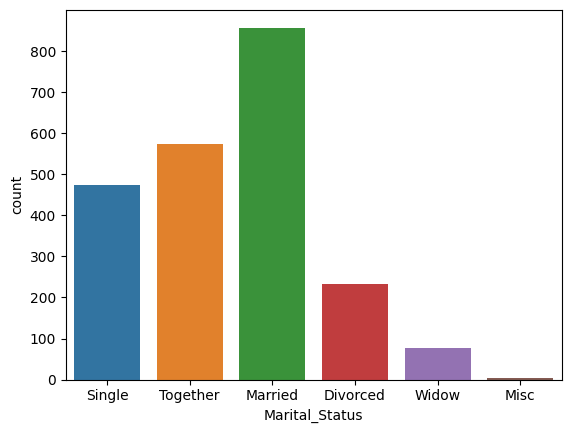

In [262]:
sns.countplot(df, x= 'Marital_Status')

<ipython-input-263-a443585fe7b2>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.




<Axes: xlabel='Education', ylabel='Income'>

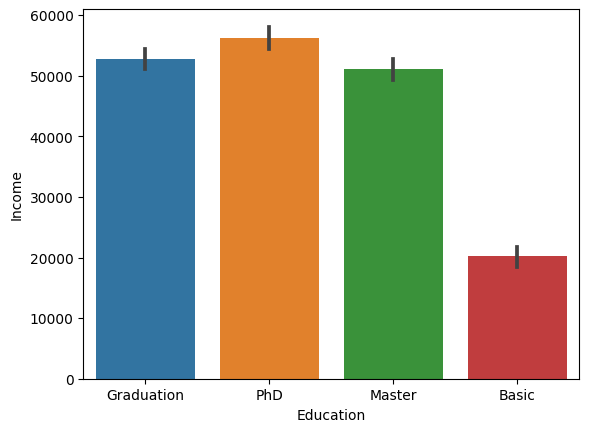

In [263]:
# looking at categorica features with respect to numerical features
sns.barplot(df, x= 'Education', y= 'Income', ci= 95)

<ipython-input-264-21e8ddef0be4>:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.




<Axes: xlabel='Marital_Status', ylabel='Income'>

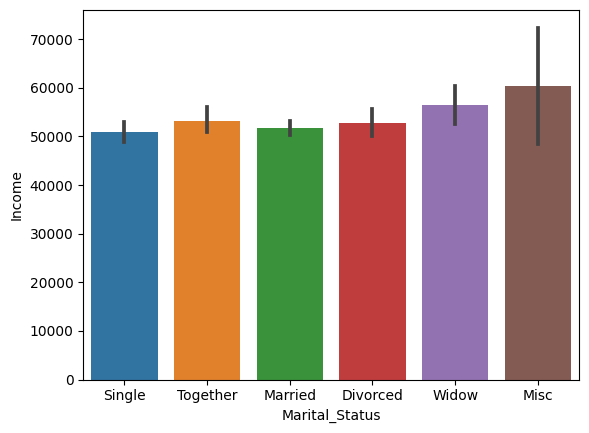

In [264]:
sns.barplot(df, x= 'Marital_Status', y= 'Income', ci= 95)

In [265]:
df.head(1)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0             0         0         1

In [266]:
def barplpot(df, x, y):
  sns.barplot(df, x=x, y=y)

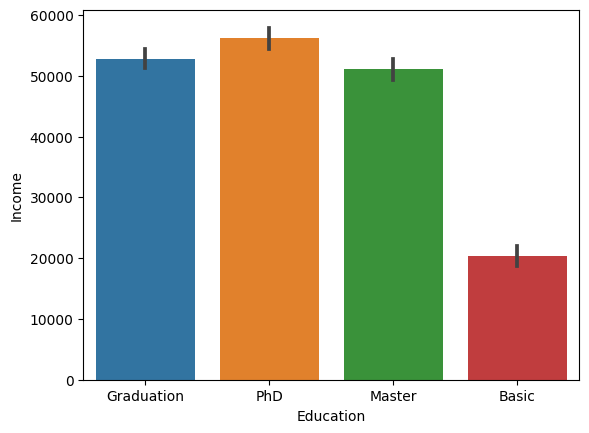

In [267]:
barplpot(df, 'Education', 'Income')

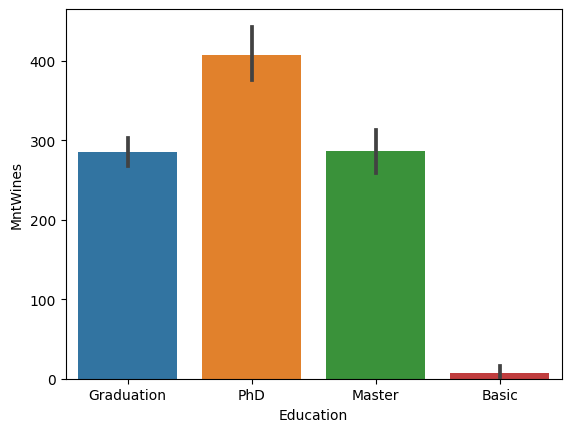

In [268]:
barplpot(df, 'Education', 'MntWines')

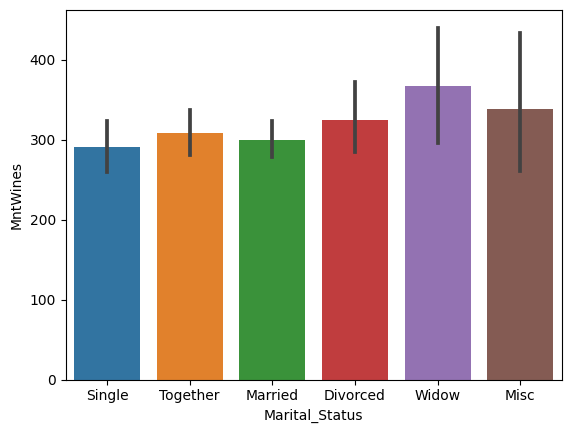

In [269]:
barplpot(df, 'Marital_Status', 'MntWines')

<Axes: xlabel='Education', ylabel='Income'>

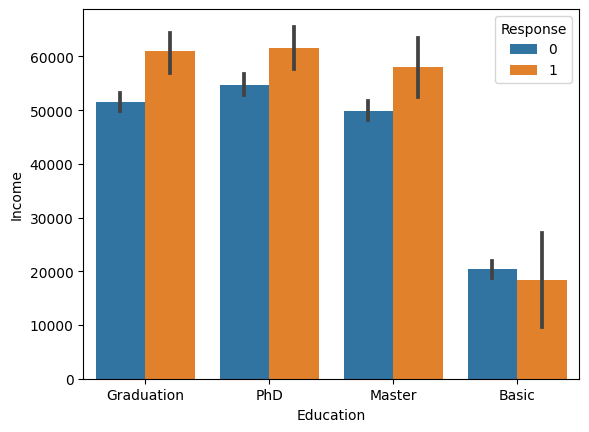

In [270]:
sns.barplot(df, x= 'Education', y= 'Income', hue = 'Response')

<Axes: xlabel='Education', ylabel='Income'>

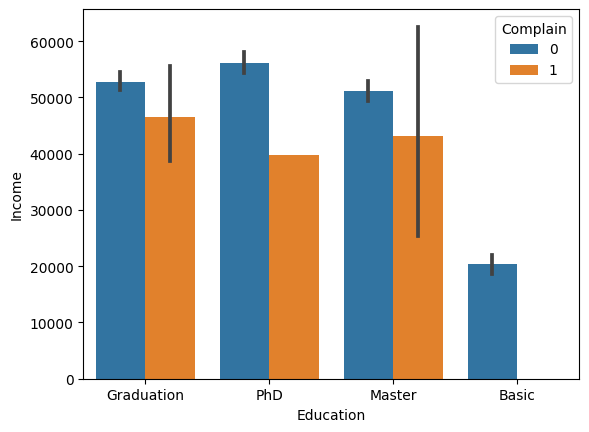

In [271]:
sns.barplot(df, x= 'Education', y= 'Income', hue = 'Complain')

In [272]:
df.head(1)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0             0         0         1

<Axes: xlabel='Marital_Status', ylabel='MntWines'>

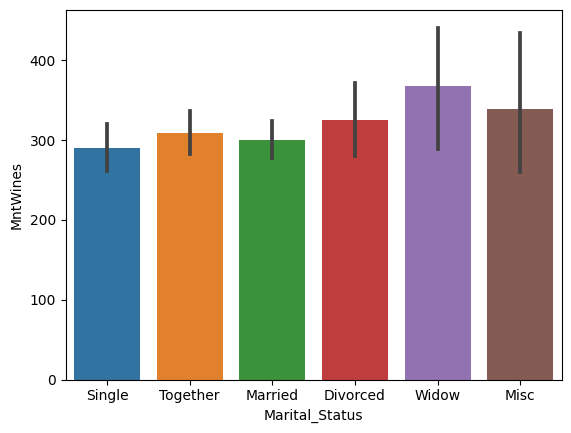

In [273]:
sns.barplot(df, x= 'Marital_Status', y= 'MntWines')

In [274]:
import plotly.express as px

<Axes: xlabel='Kidhome', ylabel='NumWebPurchases'>

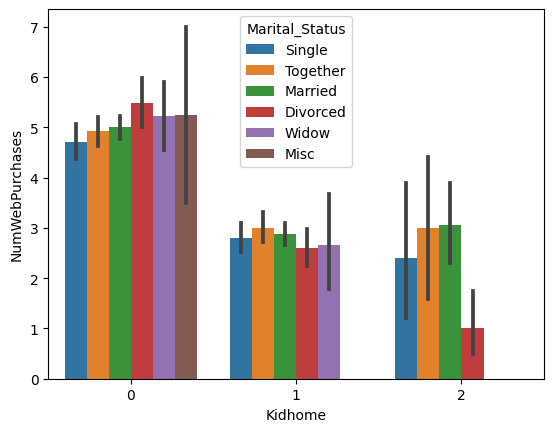

In [275]:
sns.barplot(df, x= 'Kidhome', y= 'NumWebPurchases', hue= 'Marital_Status')

<Axes: xlabel='Kidhome', ylabel='NumWebPurchases'>

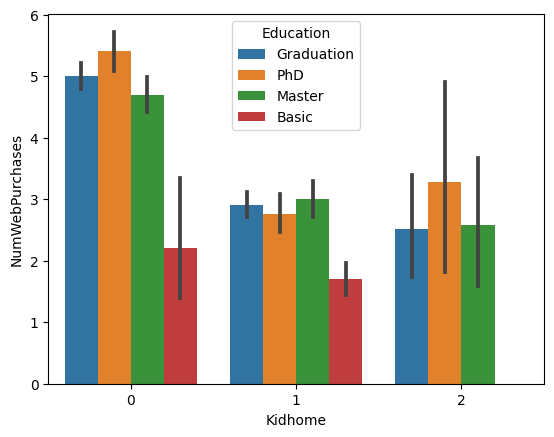

In [276]:
sns.barplot(df, x= 'Kidhome', y= 'NumWebPurchases', hue= 'Education')

In [277]:
px.scatter(df, x= 'Income', y= 'MntWines', color= 'Marital_Status', size= 'Income')

In [278]:
px.scatter(df, x= 'Income', y= 'MntWines', color= 'Education', size= 'Income')

**Observation**
- We can see from the data here that the higher the income the more they spend on alcholic beverages.

In [279]:
df.head(1)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0             0         0         1

In [280]:
# create a functionn to see if this pattern holds for all items purchased
def scatterplot(df, x, y, color, size):
  px.scatter(df, x= x, y= y, color= color, size= size)

In [281]:
scatterplot(df,'Income', 'MntFruits', 'Marital_Status', 'Income')

In [282]:
px.scatter(df, x= 'Income', y= 'MntFruits',size= 'Income')

In [283]:
px.scatter(df, x= 'Income', y= 'MntMeatProducts', color= 'Education', size= 'Income')

In [284]:
px.scatter(df, x= 'Income', y= 'MntFishProducts', color= 'Education', size= 'Income')

In [285]:
df.head(1)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0             0         0         1

In [286]:
px.scatter(df, x= 'Income', y= 'MntSweetProducts', color= 'Education', size= 'Income')

**Observation**
- Incomehas a strong positive correlation on all purchased items.

In [287]:
df.head(1)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0             0         0         1

In [288]:
df.head(1)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0             0         0         1

In [289]:
df.corr()

<ipython-input-289-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



ID  Year_Birth    Income   Kidhome  Teenhome  \
ID                   1.000000    0.002355  0.013095  0.001736 -0.003030   
Year_Birth           0.002355    1.000000 -0.161791  0.233615 -0.350791   
Income               0.013095   -0.161791  1.000000 -0.428669  0.019133   
Kidhome              0.001736    0.233615 -0.428669  1.000000 -0.039869   
Teenhome            -0.003030   -0.350791  0.019133 -0.039869  1.000000   
Recency             -0.044376   -0.016295 -0.003970  0.011492  0.013838   
MntWines            -0.021084   -0.159451  0.578650 -0.497336  0.003747   
MntFruits            0.007326   -0.017747  0.430842 -0.373396 -0.176558   
MntMeatProducts     -0.005902   -0.033697  0.584633 -0.439261 -0.261122   
MntFishProducts     -0.023992   -0.040425  0.438871 -0.388884 -0.205242   
MntSweetProducts    -0.005936   -0.020204  0.440744 -0.378026 -0.163056   
MntGoldProds        -0.011172   -0.064208  0.325916 -0.355029 -0.019887   
NumDealsPurchases   -0.040612   -0.058668 -0.083101  0.216913  0.386246   
NumWebPurchases     -0.018476   -0.153051  0.387878 -0.371977  0.162077   
NumCatalogPurchases -0.002274   -0.121764  0.589162 -0.504501 -0.112692   
NumStorePurchases   -0.013070   -0.127891  0.529362 -0.501349  0.049737   
NumWebVisitsMonth   -0.007794    0.123904 -0.553088  0.447477  0.131240   
AcceptedCmp3        -0.035890    0.061784 -0.016174  0.016066 -0.042522   
AcceptedCmp4        -0.023933   -0.066109  0.184400 -0.162026  0.038376   
AcceptedCmp5        -0.007064    0.010575  0.335943 -0.205305 -0.190791   
AcceptedCmp1        -0.018219   -0.009611  0.276820 -0.174163 -0.144855   
AcceptedCmp2        -0.012718   -0.013849  0.082880 -0.079980 -0.012094   
Complain             0.034154   -0.030407 -0.027225  0.040978  0.003307   
Response            -0.021491    0.023692  0.133047 -0.077909 -0.153901   

                      Recency  MntWines  MntFruits  MntMeatProducts  \
ID                  -0.044376 -0.021084   0.007326        -0.005902   
Year_Birth          -0.016295 -0.159451  -0.017747        -0.033697   
Income              -0.003970  0.578650   0.430842         0.584633   
Kidhome              0.011492 -0.497336  -0.373396        -0.439261   
Teenhome             0.013838  0.003747  -0.176558        -0.261122   
Recency              1.000000  0.015721  -0.005844         0.022518   
MntWines             0.015721  1.000000   0.387024         0.568860   
MntFruits           -0.005844  0.387024   1.000000         0.547822   
MntMeatProducts      0.022518  0.568860   0.547822         1.000000   
MntFishProducts      0.000551  0.397721   0.593431         0.573574   
MntSweetProducts     0.025110  0.390326   0.571606         0.535136   
MntGoldProds         0.017663  0.392731   0.396487         0.359446   
NumDealsPurchases    0.002115  0.008886  -0.134512        -0.121308   
NumWebPurchases     -0.005641  0.553786   0.302039         0.307090   
NumCatalogPurchases  0.024081  0.634753   0.486263         0.734127   
NumStorePurchases   -0.000434  0.640012   0.458491         0.486006   
NumWebVisitsMonth   -0.018564 -0.321978  -0.418729        -0.539484   
AcceptedCmp3        -0.032257  0.061463   0.014424         0.018438   
AcceptedCmp4         0.017566  0.373143   0.006396         0.091618   
AcceptedCmp5        -0.000482  0.473550   0.212871         0.376867   
AcceptedCmp1        -0.021061  0.351417   0.191816         0.313076   
AcceptedCmp2        -0.007596  0.211347  -0.010313         0.032727   
Complain             0.013637 -0.039470  -0.005324        -0.023782   
Response            -0.199766  0.246299   0.122443         0.237746   

                     MntFishProducts  MntSweetProducts  MntGoldProds  \
ID                         -0.023992         -0.005936     -0.011172   
Year_Birth                 -0.040425         -0.020204     -0.064208   
Income                      0.438871          0.440744      0.325916   
Kidhome                    -0.388884         -0.378026     -0.355029   
Teenhome       

In [290]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2216.000000  2216.000000    2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.820397   52247.251354     0.441787     0.505415   
std     3249.376275    11.985554   25173.076661     0.536896     0.544181   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8421.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2216.000000  2216.000000  2216.000000      2216.000000   
mean     49.012635   305.091606    26.356047       166.995939   
std      28.948352   337.327920    39.793917       224.283273   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    24.000000     2.000000        16.000000   
50%      49.000000   174.500000     8.000000        68.000000   
75%      74.000000   505.000000    33.000000       232.250000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2216.000000       2216.000000   2216.000000        2216.000000   
mean         37.637635         27.028881     43.965253           2.323556   
std          54.752082         41.072046     51.815414           1.923716   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.500000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        262.000000    321.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2216.000000          2216.000000        2216.000000   
mean          4.085289             2.671029           5.800993   
std           2.740951             2.926734           3.250785   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2216.000000   2216.000000   2216.000000   2216.000000   
mean            5.319043      0.073556      0.074007      0.073105   
std             2.425359      0.261106      0.261842      0.260367   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  
count   2216.000000   2216.000000  2216.000000  2216.000000  
mean       0.064079      0.013087     0.009477     0.150271  
std        0.244950      0.113672     0.096907     0.357417  
min        0.000000      0.000000     0.000000     0.000000  
25%        0.000000      0.000000     0.000000     0.000000  
50%        0.000000      0.000000     0.000000     0.000000  
75%        0.000000      0.000000     0.000000     0.000000  
max        1.000000      1.000000     1.000000     1.000000

<Axes: xlabel='Education', ylabel='Income'>

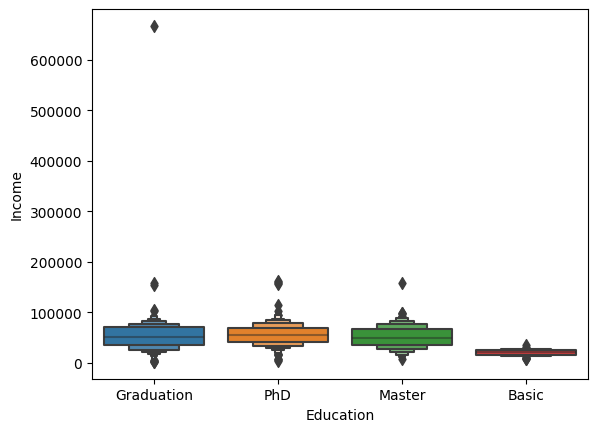

In [291]:
sns.boxenplot(df, x= 'Education', y= 'Income')

In [292]:
df.head(1
        )

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0             0         0         1

In [293]:
px.box(df, x= 'Education', y= 'Income')

In [294]:
px.box(df, x= 'Marital_Status', y= 'Income')

In [295]:
px.density_heatmap(df, x= 'Teenhome', y= 'Income', text_auto= True)

<Axes: xlabel='Income', ylabel='NumWebPurchases'>

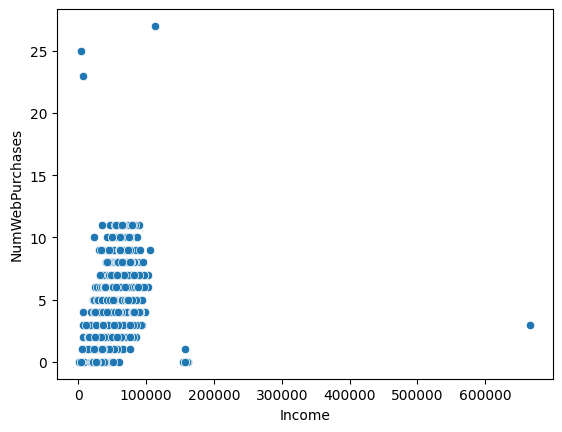

In [296]:
sns.scatterplot(df, x= 'Income',y= 'NumWebPurchases')

In [297]:
# create a scatterplot function
def scatter_plot(df, x, y, hue):
  sns.scatterplot(df, x= x,y= y, hue= hue)

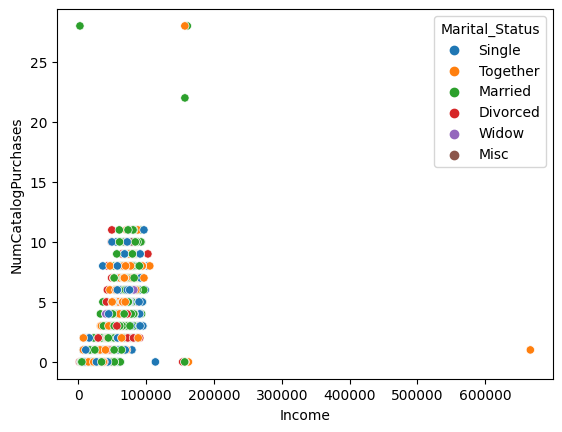

In [298]:
scatter_plot(df, 'Income', 'NumCatalogPurchases', 'Marital_Status')

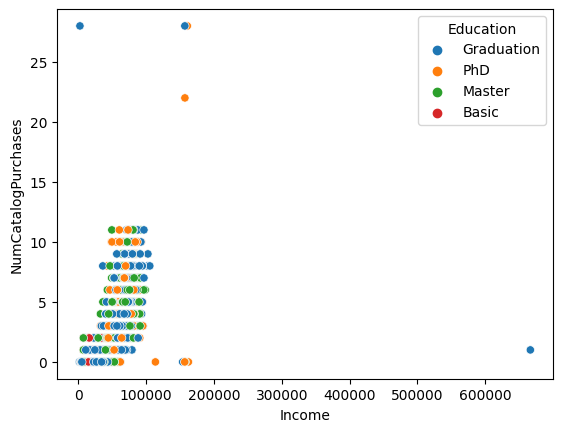

In [299]:
scatter_plot(df, 'Income', 'NumCatalogPurchases', 'Education')

<Axes: xlabel='Income', ylabel='NumWebPurchases'>

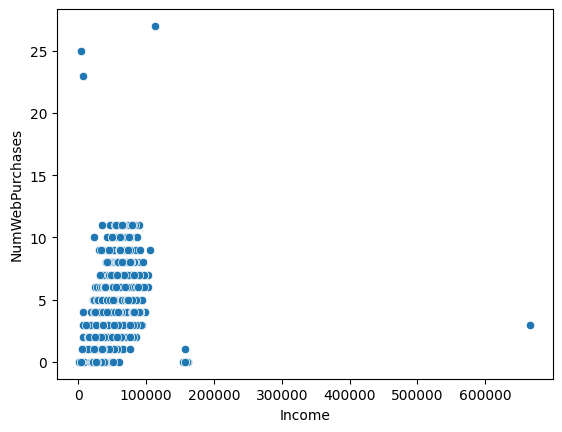

In [300]:
sns.scatterplot(df, x= 'Income',y= 'NumWebPurchases')

In [301]:
df.head(1)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0             0         0         1

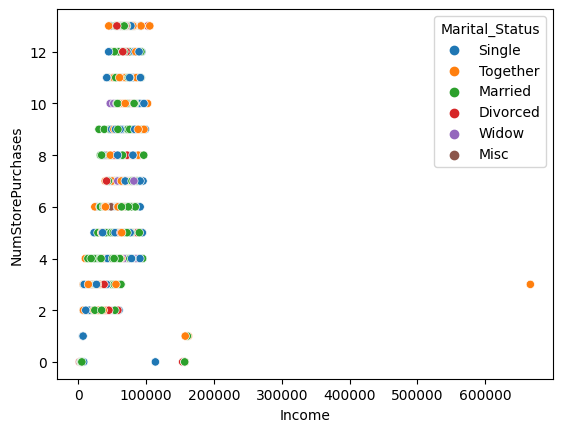

In [302]:
scatter_plot(df, 'Income', 'NumStorePurchases', 'Marital_Status')

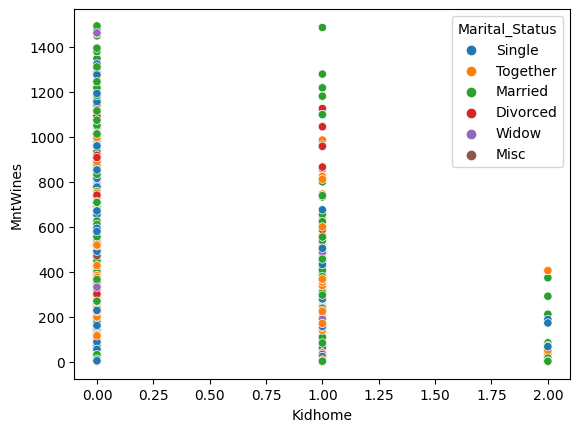

In [303]:
scatter_plot(df, 'Kidhome', 'MntWines', 'Marital_Status')

**Observations**:
1. How does the distribution of Income variable vary across the dataset?
  - Income is pretty flat across the data. Regardless of martital status or education The didtribution is about the same.
2. The histogram and the box plot are showing some extreme value on the right side of the distribution of the 'Income' feature. Can we consider them as outliers and remove or should we analyze these extreme values?
  - We can analyze these extreme values. Some of the models that we will be testing are robust enough. Also, I will be transforming the data as well, which will help mitigate the presence of outliers
3. There are only a few rows with extreme values for the Income variable. Is that enough information to treat (or not to treat) them? At what percentile the upper whisker lies?
  - It is eniug not to treat

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?
- There are not any real strong correlations in the data. There fore the most if not all the variable are independent of one another.


## **Data Preparation for Segmentation**

- The decision about which variables to use for clustering is a critically important decision that will have a big impact on the clustering solution. So we need to think carefully about the variables we will choose for clustering. Clearly, this is a step where a lot of contextual knowledge, creativity, and experimentation/iterations are needed.
- Moreover, we often use only a few of the data attributes for segmentation (the segmentation attributes) and use some of the remaining ones (the profiling attributes) only to profile the clusters. For example, in market research and market segmentation, we can use behavioral data for segmentation (to segment the customers based on their behavior like amount spent, units bought, etc.), and then use both demographic as well as behavioral data for profiling the segments found.
- Plot the correlation plot after we've removed the irrelevant variables
- Scale the Data

In [304]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [305]:
num_cols= df.select_dtypes(np.number).columns.values
len(num_cols)

24

In [306]:
# start to preprocess data
# get sklearn preprocessing package
# scling the dataframe
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(df[num_cols])
scaled_df= scaler.transform(df[num_cols])

In [307]:
scaled_df

array([[-0.0198093 , -0.98644293,  0.2340627 , ..., -0.11515283,
        -0.09781206,  2.37795178],
       [-1.05100909, -1.23680074, -0.23455948, ..., -0.11515283,
        -0.09781206, -0.42052997],
       [-0.44552551, -0.31882209,  0.76947764, ..., -0.11515283,
        -0.09781206, -0.42052997],
       ...,
       [ 0.51764587,  1.01641959,  0.18809052, ..., -0.11515283,
        -0.09781206, -0.42052997],
       [ 0.81469298, -1.06989553,  0.67538765, ..., -0.11515283,
        -0.09781206, -0.42052997],
       [ 1.17484335, -1.23680074,  0.02470453, ..., -0.11515283,
        -0.09781206,  2.37795178]])

In [308]:
scaled_df= pd.DataFrame(scaled_df, columns= num_cols)
scaled_df

ID  Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  \
0    -0.019809   -0.986443  0.234063 -0.823039 -0.928972  0.310532  0.978226   
1    -1.051009   -1.236801 -0.234559  1.039938  0.909066 -0.380509 -0.872024   
2    -0.445526   -0.318822  0.769478 -0.823039 -0.928972 -0.795134  0.358511   
3     0.182737    1.266777 -1.017239  1.039938 -0.928972 -0.795134 -0.872024   
4    -0.081373    1.016420  0.240221  1.039938 -0.928972  1.554407 -0.391671   
...        ...         ...       ...       ...       ...       ...       ...   
2211  1.625801   -0.151917  0.356642 -0.823039  0.909066 -0.104093  1.197646   
2212 -0.488620   -1.904422  0.467539  2.902916  0.909066  0.241428  0.299208   
2213  0.517646    1.016420  0.188091 -0.823039 -0.928972  1.450751  1.787710   
2214  0.814693   -1.069896  0.675388 -0.823039  0.909066 -1.417072  0.364441   
2215  1.174843   -1.236801  0.024705  1.039938  0.909066 -0.311405 -0.655568   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0      1.549429         1.690227         2.454568          1.484827   
1     -0.637328        -0.717986        -0.651038         -0.633880   
2      0.569159        -0.178368         1.340203         -0.146821   
3     -0.561922        -0.655551        -0.504892         -0.585174   
4      0.418348        -0.218505         0.152766         -0.000703   
...         ...              ...              ...               ...   
2211   0.418348         0.066913         0.079693          2.215416   
2212  -0.662463        -0.610954        -0.687574         -0.658233   
2213   0.544024         0.223001        -0.102990         -0.365998   
2214   0.091591         0.209622         0.773887          0.072356   
2215  -0.587058        -0.472705        -0.651038         -0.633880   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0         0.850031           0.351713         1.428553             2.504712   
1        -0.732867          -0.168231        -1.125881            -0.571082   
2        -0.037937          -0.688176         1.428553            -0.229327   
3        -0.752171          -0.168231        -0.760962            -0.912837   
4        -0.559135           1.391603         0.333796             0.112428   
...            ...                ...              ...                  ...   
2211      3.919308          -0.168231         1.793473             0.112428   
2212     -0.694260           2.431492         1.428553            -0.229327   
2213     -0.385402          -0.688176        -0.760962             0.112428   
2214      0.328832          -0.168231         0.698715             0.795937   
2215     -0.443313           0.351713        -0.396043            -0.571082   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0             -0.554143           0.693232     -0.281773     -0.282705   
1             -1.169518          -0.131574     -0.281773     -0.282705   
2              1.291982          -0.543978     -0.281773     -0.282705   
3             -0.554143           0.280829     -0.281773     -0.282705   
4              0.061232          -0.131574     -0.281773     -0.282705   
...                 ...                ...           ...           ...   
2211          -0.554143          -0.131574     -0.281773     -0.282705   
2212          -0.246455           0.693232     -0.281773     -0.282705   
2213           2.215044           0.280829     -0.281773      3.537258   
2214           1.291982          -0.956381     -0.281773     -0.282705   
2215          -0.554143           0.693232     -0.281773     -0.282705   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0        -0.280839     -0.261661     -0.115153 -0.097812  2.377952  
1        -0.280839     -0.261661     -0.115153 -0.097812 -0.420530  
2        -0.280839     -0.261661     -0.115153 -0.097812 -0.420530  
3        -0.280839     -0.261661     -0.115153 -0.097812 -0.420530  
4        -0.280

In [309]:
scaled_df.shape[1]

24

## **Applying T-SNE and PCA to the data to visualize the data distributed in 2 dimensions**

### **Applying T-SNE**

In [310]:
#TSNE
from sklearn.manifold import TSNE
tsne= TSNE(n_components= 2, random_state= 1, perplexity= 35)

tsne_df= tsne.fit_transform(scaled_df)

<Axes: >

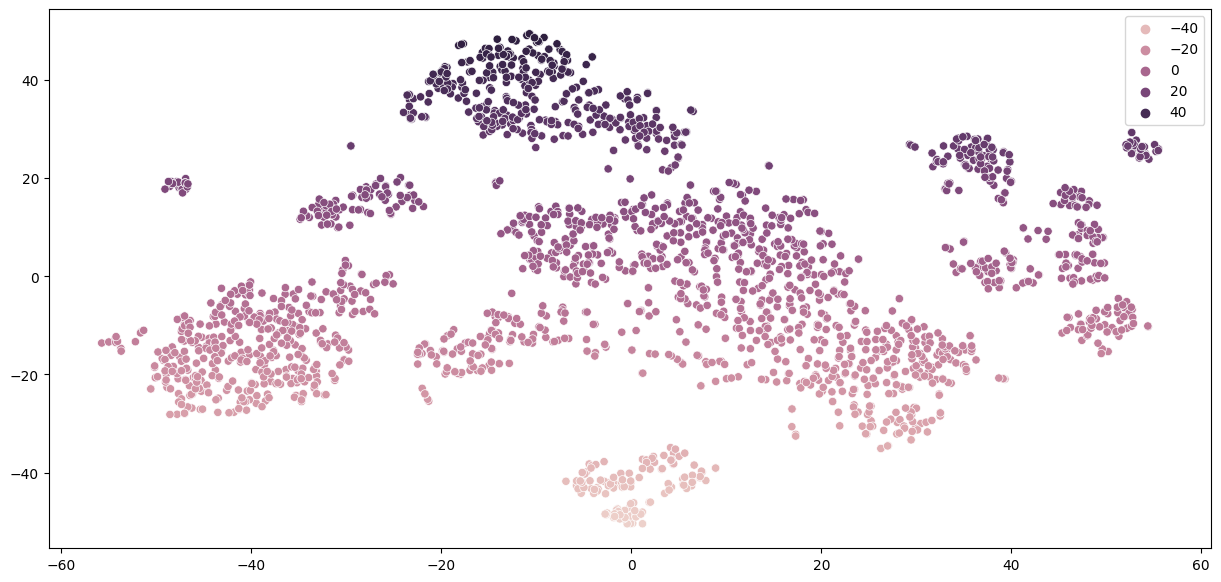

In [311]:
# visualize TSNE
plt.figure(figsize=(15,7))
sns.scatterplot(x= tsne_df[:, 0], y= tsne_df[:, 1], hue= tsne_df[:, -1], color= 'rainbowe')

### **Applying PCA**

In [312]:
#PCA
from sklearn.decomposition import PCA
pca= PCA(n_components= scaled_df.shape[1], random_state= 0)
pca.fit(scaled_df)
pca_df= pca.transform(scaled_df)

In [313]:
pca_df= pd.DataFrame(pca_df)

In [314]:
pca_df

0         1         2         3         4         5         6   \
0     3.771613 -0.077035 -0.295831  2.073670  0.090776 -0.020090  0.127698   
1    -2.376186  0.233511 -0.175351 -0.932772  0.681587  1.156263 -0.643222   
2     1.620829  0.092552 -1.033293 -0.085817  0.217307 -0.356136 -0.673934   
3    -2.521485 -1.417675  0.015881  0.218897 -0.250038 -0.998615 -0.310507   
4    -0.462017 -0.154389 -0.662153  0.604140 -2.046835 -0.380499  0.684085   
...        ...       ...       ...       ...       ...       ...       ...   
2211  2.367626  1.480201 -1.124845  1.215018  0.418615 -0.832108  0.406079   
2212 -0.969972  2.410386  1.712407  0.525772 -0.554452  0.264734  0.357436   
2213  1.461572  0.019758  0.952167 -1.983966 -2.036244 -1.113142  0.541166   
2214  1.750824  1.273496 -1.083085 -0.469711  1.722526 -0.652136 -0.587997   
2215 -1.692805  0.677553  1.066360  0.359173  1.732169 -0.432546  0.006275   

            7         8         9         10        11        12        13  \
0     0.223685 -0.312914 -1.449057  0.491154 -2.910924 -0.317691  0.783035   
1     0.867890 -0.530426 -0.346513  0.856224  0.145329  0.147244 -0.431740   
2     0.754189  0.954242  0.037098 -0.989840  0.125925 -0.340793  0.449616   
3     0.327075  0.247588  0.339040 -0.042671  0.386763  0.086503  0.090439   
4    -0.247983 -0.610886  0.453973  0.801718 -0.188325 -0.348875  0.146741   
...        ...       ...       ...       ...       ...       ...       ...   
2211 -1.769210  1.016657 -1.461223 -1.070928  0.414718  1.663286 -1.147631   
2212  0.604242 -3.158501 -1.857119  1.434801  2.175180 -0.052613  1.560845   
2213 -0.563121  0.693492  1.191233 -1.650612 -0.733545 -1.276613  0.293150   
2214  0.008390  0.377847  0.242060  0.075597  0.408114  0.122109  0.221920   
2215 -0.316934 -1.131901 -0.691112  0.785418 -1.338592  0.022717 -0.303390   

            14        15        16        17        18        19        20  \
0     0.049444 -0.101827 -0.201843  0.663433  1.028002  0.720214 -0.247772   
1    -0.119471  0.322385  0.259618  0.151164  0.214615 -0.048301 -0.248478   
2     0.671651  0.629821  0.965069 -0.403452 -0.271809  0.697061  0.864771   
3     0.039511  0.274769 -0.067247 -0.090080 -0.254836  0.000004  0.078722   
4     0.150602  0.073697  0.449851 -0.233788 -0.232630 -0.184752  0.914666   
...        ...       ...       ...       ...       ...       ...       ...   
2211 -0.208033 -0.414334  0.321014  1.899806  0.399114 -0.904246 -0.901636   
2212  0.838906  1.398073  1.356309 -0.313721 -0.226425 -0.730434  0.185155   
2213 -1.936476  0.394538 -0.009445 -1.303326 -0.801247 -0.146587 -0.882891   
2214  0.048023  0.297238  0.044405 -0.061235 -0.306501  0.480365 -0.044915   
2215  0.205473 -0.891240  0.896101 -0.222897 -0.433271  0.219576 -0.386597   

            21        22        23  
0    -0.162590 -0.722514  0.206078  
1    -0.181812 -0.120967 -0.014324  
2    -0.039606 -0.128960  0.072911  
3    -0.248196 -0.015433 -0.080874  
4    -0.149055 -0.469849 -0.000464  
...        ...       ...       ...  
2211 -0.183457 -0.075353 -1.121169  
2212 -0.674521 -0.258695 -0.233182  
2213  0.950187  0.028393  0.038248  
2214 -0.314408 -0.082989  0.358318  
2215  0.157890  0.072447  0.264993  

[2216 rows x 24 columns]

In [315]:
pca.explained_variance_ratio_

array([0.27255179, 0.08476283, 0.07911459, 0.05856432, 0.04636168,
       0.04310938, 0.04241184, 0.03910951, 0.03603439, 0.03159431,
       0.03092413, 0.02743982, 0.02551551, 0.02426151, 0.02334881,
       0.02163976, 0.01928788, 0.0178061 , 0.01701437, 0.01563553,
       0.01318062, 0.01245174, 0.00973446, 0.00814512])

In [316]:
sum(pca.explained_variance_ratio_[:18])

0.9238381749035294

In [317]:
pca_df.var()/sum(pca_df.var())

0     0.272552
1     0.084763
2     0.079115
3     0.058564
4     0.046362
5     0.043109
6     0.042412
7     0.039110
8     0.036034
9     0.031594
10    0.030924
11    0.027440
12    0.025516
13    0.024262
14    0.023349
15    0.021640
16    0.019288
17    0.017806
18    0.017014
19    0.015636
20    0.013181
21    0.012452
22    0.009734
23    0.008145
dtype: float64

In [318]:
# get loadings
pd.DataFrame(pca.components_)

0         1         2         3         4         5         6   \
0  -0.005219 -0.057610  0.291531 -0.255544 -0.056727  0.000610  0.306107   
1  -0.027274 -0.338018  0.067812 -0.097638  0.537596  0.037502  0.167017   
2  -0.042179  0.051154 -0.030698  0.086538 -0.025577 -0.108698  0.193512   
3  -0.067612  0.275697 -0.133448  0.186035 -0.091515 -0.183914 -0.046132   
4   0.357063 -0.414189  0.073487 -0.178031  0.182412 -0.572202 -0.068388   
5  -0.578557 -0.329449 -0.006429 -0.113490  0.131998  0.381777 -0.035115   
6   0.285838  0.019086 -0.012784  0.109167 -0.033732  0.384320  0.024580   
7  -0.656468 -0.014877  0.014772  0.060172 -0.044772 -0.409991 -0.029918   
8  -0.088076  0.150172 -0.159996 -0.256975 -0.083326 -0.185492 -0.015736   
9  -0.052581  0.401822  0.274418 -0.024679 -0.026827 -0.085046  0.188004   
10  0.023576 -0.091374  0.168099  0.374200  0.153024 -0.014291 -0.150614   
11 -0.029535  0.320867  0.142577  0.101910  0.309609 -0.219553 -0.024856   
12 -0.039094  0.010225 -0.025633 -0.016657 -0.090304 -0.051438 -0.012444   
13  0.016440 -0.009976 -0.067677 -0.224364 -0.266517  0.024952  0.051409   
14 -0.028039 -0.112105  0.016683  0.007598 -0.114264  0.038468  0.149554   
15  0.004345 -0.424898 -0.064702  0.347150 -0.428318 -0.221908  0.179140   
16 -0.020258 -0.063771  0.583179  0.444434 -0.112357  0.083459 -0.030240   
17 -0.008776  0.022132  0.201578 -0.020942 -0.035592 -0.075466 -0.127112   
18 -0.039504  0.127421  0.206622 -0.123578  0.215881 -0.066501  0.051781   
19  0.028811  0.098430 -0.033768  0.035791  0.216755  0.034250  0.105861   
20  0.017956 -0.030588  0.184079 -0.355916 -0.310665  0.029457 -0.423271   
21 -0.002175 -0.037197  0.507546 -0.300041 -0.152325  0.024502  0.116889   
22  0.005970 -0.032765 -0.027678 -0.025645  0.108584 -0.012428 -0.313383   
23 -0.014392 -0.024962  0.099133  0.053278  0.057300  0.008520 -0.627119   

          7         8         9         10        11        12        13  \
0   0.266264  0.314281  0.276256  0.269354  0.221397 -0.055444  0.212109   
1  -0.102541 -0.127076 -0.112186 -0.092423  0.102410  0.459512  0.358878   
2  -0.198343 -0.058716 -0.194604 -0.164997 -0.059743  0.060039  0.044956   
3   0.143536  0.037629  0.122146  0.105589  0.285906  0.339471  0.233346   
4  -0.035732 -0.028246 -0.059910 -0.088092 -0.039522 -0.199397 -0.091694   
5  -0.077799 -0.017492 -0.032103 -0.064583  0.077457 -0.173146 -0.116607   
6   0.023164  0.027161 -0.008063  0.019413  0.025297  0.058750  0.029199   
7   0.051462  0.037952  0.067692  0.045787 -0.175852  0.081014 -0.010543   
8   0.097610 -0.181726  0.077235  0.017348  0.234325 -0.224607  0.046680   
9  -0.228175  0.179809 -0.309104 -0.272215 -0.223551  0.081867 -0.035517   
10  0.080699  0.189237  0.118494  0.085440 -0.127271  0.389902 -0.355126   
11 -0.058036 -0.211875  0.007766  0.060008  0.059895 -0.032045  0.000804   
12 -0.254036  0.040696 -0.108511 -0.359080  0.705488  0.074787 -0.110166   
13 -0.286958  0.176464  0.042209 -0.262733 -0.184522  0.029668  0.097789   
14 -0.079907  0.000975 -0.183657  0.122299 -0.282173 -0.112135  0.336478   
15 -0.006895  0.074025  0.124080 -0.105228  0.024759  0.064296  0.019293   
16  0.041238 -0.141439  0.010782 -0.203226  0.139340 -0.284232  0.288207   
17 -0.582879  0.038004  0.011827  0.570589  0.085771 -0.036917  0.198710   
18  0.381881  0.219101 -0.002131 -0.259762 -0.062441 -0.141786  0.141863   
19 -0.343393 -0.008813  0.801348 -0.263827 -0.133028 -0.103121  0.002151   
20  0.079627 -0.181931  0.150938 -0.193578 -0.136410  0.423170  0.269519   
21 -0.042016 -0.092396  0.037086  0.099478  0.067080  0.147915 -0.511985   
22 -0.099490  0.756175 -0.062272 -0.035584  0.086853 -0.043554  0.056688   
23 -0.011978 -0.098142 -0.017058 -0.065127 -0.019368 -0.195081  0.035624   

          14        15        16        17        18        19        20  \
0   0.318655  0.282812 -0.247145  0.019963  0.096033  0.192276  0.171560   
1   0.014365  0.207604  0.170213 -0.085924  0.123560 -0.

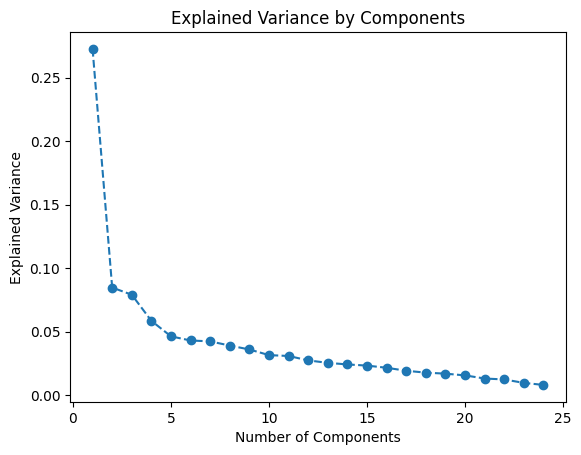

In [319]:
explained_var = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Components')
plt.show()

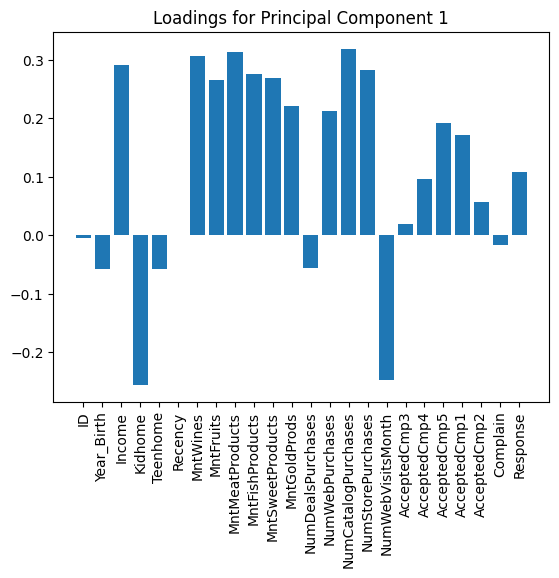

In [386]:
# examining the principal compnemnts
component_num = 0  # change this to look at other components
loadings = pca.components_[component_num]
features = list(scaled_df.columns)

plt.bar(features, loadings)
plt.xticks(rotation=90)
plt.title(f'Loadings for Principal Component {component_num + 1}')
plt.show()

In [388]:
# examine loading function
# examining the principal compnemnts
def pca_loading(component_num):
  component_num = component_num  # change this to look at other components
  loadings = pca.components_[component_num]
  features = list(scaled_df.columns)

  plt.bar(features, loadings)
  plt.xticks(rotation=90)
  plt.title(f'Loadings for Principal Component {component_num + 1}')
  plt.show()

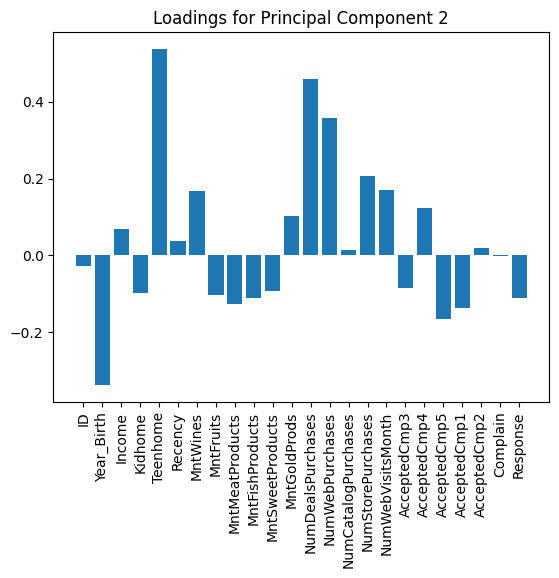

In [389]:
pca_loading(1)

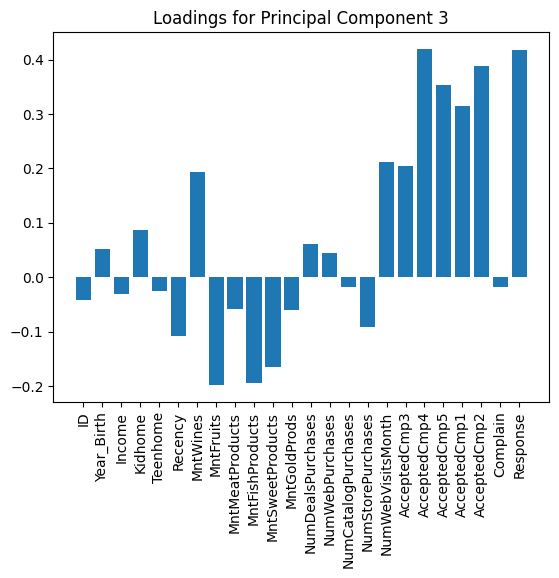

In [390]:
pca_loading(2)

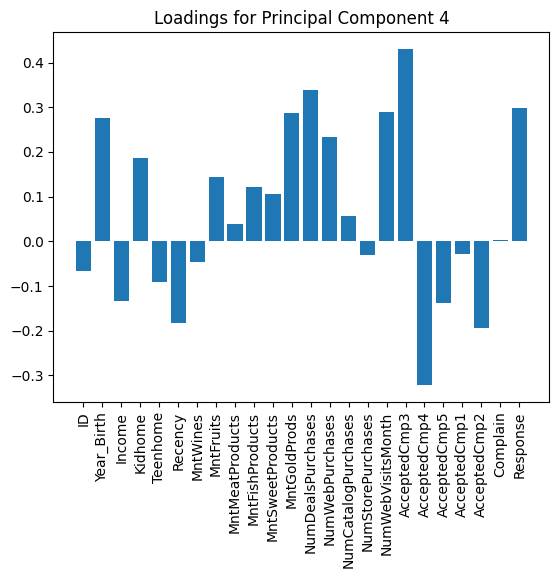

In [391]:
pca_loading(3)

**Observation and Insights:**
- For processing speed i only need to 12 features.

**Think about it:**
- Should we apply clustering algorithms on the current data or should we apply PCA on the data before applying clustering algorithms? How would this help?

:**Observation and Insights:**
- T-SNE gives a clearer picture of the clusters.

## **K-Means**

**Think About It:**

- How do we determine the optimal K value from the elbow curve?
- Which metric can be used to determine the final K value?

In [321]:
# centroid clustering technique
from sklearn.cluster import KMeans
model = KMeans(n_clusters= 3)
model.fit(pca_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

In [322]:
# model prediction
model.predict(pca_df)

array([0, 1, 2, ..., 2, 2, 1], dtype=int32)

<Axes: xlabel='1', ylabel='21'>

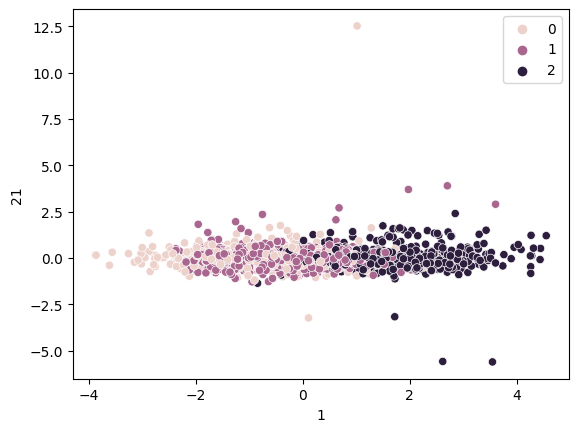

In [323]:
# create visualization with scatterplot
sns.scatterplot(x= pca_df.iloc[:, 1], y= pca_df.iloc[:, 21], hue= model.predict(pca_df))

In [324]:
# defing clusters
from scipy.spatial.distance import cdist
clusters_= range(1, 18)
distortion= []

for k in clusters_:
  model = KMeans(n_clusters=k)
  model.fit(pca_df)
  Y= model.predict(pca_df)

  distortion.append(sum(np.min(cdist(pca_df, model.cluster_centers_), axis= 1))/pca_df.shape[0])



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [325]:
distortion

[4.539748263149645,
 3.955346140237283,
 3.754619506068066,
 3.6479343297177005,
 3.5819935578329285,
 3.463633325164819,
 3.387898317519886,
 3.322140292210783,
 3.2990579155584387,
 3.220744022342374,
 3.1594595622803903,
 3.124486652661033,
 3.067987106344676,
 3.072175226195497,
 3.023517657475715,
 2.9708130480387975,
 2.940240531215347]

Text(0.5, 1.0, 'Elbow Analysis')

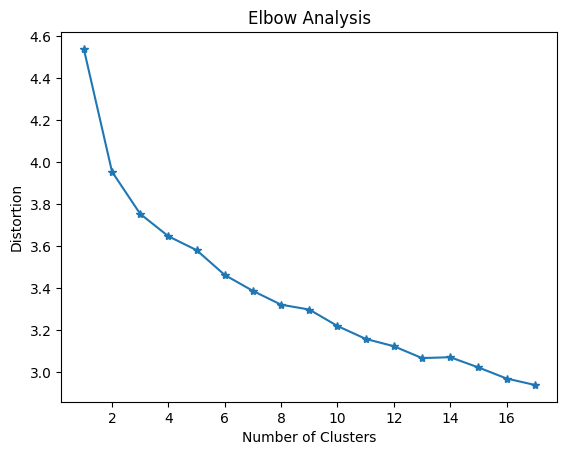

In [326]:
# plot elbow
plt.plot(clusters_, distortion, '*-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Analysis')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



<Axes: xlabel='1', ylabel='21'>

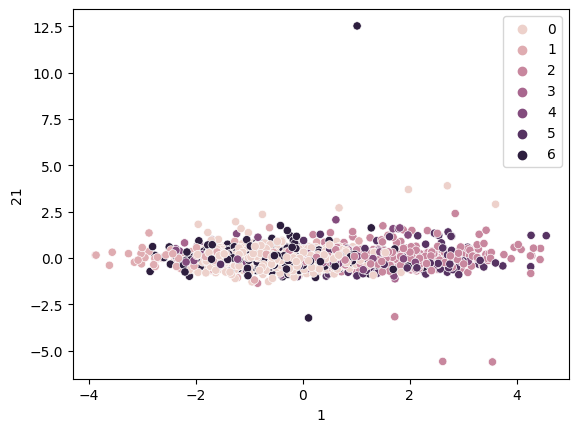

In [327]:
model= KMeans(n_clusters= 7)
model.fit(pca_df)
sns.scatterplot(x= pca_df.iloc[:, 1], y= pca_df.iloc[:, 21], hue= model.predict(pca_df))

In [328]:
df.head(1)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0             0         0         1

In [329]:
scaled_df.head(1)

ID  Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  \
0 -0.019809   -0.986443  0.234063 -0.823039 -0.928972  0.310532  0.978226   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0   1.549429         1.690227         2.454568          1.484827   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0      0.850031           0.351713         1.428553             2.504712   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0          -0.554143           0.693232     -0.281773     -0.282705   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0     -0.280839     -0.261661     -0.115153 -0.097812  2.377952

In [330]:
pca_df.head(1)

0         1         2        3         4        5         6   \
0  3.771613 -0.077035 -0.295831  2.07367  0.090776 -0.02009  0.127698   

         7         8         9         10        11        12        13  \
0  0.223685 -0.312914 -1.449057  0.491154 -2.910924 -0.317691  0.783035   

         14        15        16        17        18        19        20  \
0  0.049444 -0.101827 -0.201843  0.663433  1.028002  0.720214 -0.247772   

        21        22        23  
0 -0.16259 -0.722514  0.206078

In [331]:
model_kmeans= model

In [332]:
df_kmeans= scaled_df.copy()
df_kmeans["labels"]= model_kmeans.labels_
df_kmeans

ID  Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  \
0    -0.019809   -0.986443  0.234063 -0.823039 -0.928972  0.310532  0.978226   
1    -1.051009   -1.236801 -0.234559  1.039938  0.909066 -0.380509 -0.872024   
2    -0.445526   -0.318822  0.769478 -0.823039 -0.928972 -0.795134  0.358511   
3     0.182737    1.266777 -1.017239  1.039938 -0.928972 -0.795134 -0.872024   
4    -0.081373    1.016420  0.240221  1.039938 -0.928972  1.554407 -0.391671   
...        ...         ...       ...       ...       ...       ...       ...   
2211  1.625801   -0.151917  0.356642 -0.823039  0.909066 -0.104093  1.197646   
2212 -0.488620   -1.904422  0.467539  2.902916  0.909066  0.241428  0.299208   
2213  0.517646    1.016420  0.188091 -0.823039 -0.928972  1.450751  1.787710   
2214  0.814693   -1.069896  0.675388 -0.823039  0.909066 -1.417072  0.364441   
2215  1.174843   -1.236801  0.024705  1.039938  0.909066 -0.311405 -0.655568   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0      1.549429         1.690227         2.454568          1.484827   
1     -0.637328        -0.717986        -0.651038         -0.633880   
2      0.569159        -0.178368         1.340203         -0.146821   
3     -0.561922        -0.655551        -0.504892         -0.585174   
4      0.418348        -0.218505         0.152766         -0.000703   
...         ...              ...              ...               ...   
2211   0.418348         0.066913         0.079693          2.215416   
2212  -0.662463        -0.610954        -0.687574         -0.658233   
2213   0.544024         0.223001        -0.102990         -0.365998   
2214   0.091591         0.209622         0.773887          0.072356   
2215  -0.587058        -0.472705        -0.651038         -0.633880   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0         0.850031           0.351713         1.428553             2.504712   
1        -0.732867          -0.168231        -1.125881            -0.571082   
2        -0.037937          -0.688176         1.428553            -0.229327   
3        -0.752171          -0.168231        -0.760962            -0.912837   
4        -0.559135           1.391603         0.333796             0.112428   
...            ...                ...              ...                  ...   
2211      3.919308          -0.168231         1.793473             0.112428   
2212     -0.694260           2.431492         1.428553            -0.229327   
2213     -0.385402          -0.688176        -0.760962             0.112428   
2214      0.328832          -0.168231         0.698715             0.795937   
2215     -0.443313           0.351713        -0.396043            -0.571082   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0             -0.554143           0.693232     -0.281773     -0.282705   
1             -1.169518          -0.131574     -0.281773     -0.282705   
2              1.291982          -0.543978     -0.281773     -0.282705   
3             -0.554143           0.280829     -0.281773     -0.282705   
4              0.061232          -0.131574     -0.281773     -0.282705   
...                 ...                ...           ...           ...   
2211          -0.554143          -0.131574     -0.281773     -0.282705   
2212          -0.246455           0.693232     -0.281773     -0.282705   
2213           2.215044           0.280829     -0.281773      3.537258   
2214           1.291982          -0.956381     -0.281773     -0.282705   
2215          -0.554143           0.693232     -0.281773     -0.282705   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  labels  
0        -0.280839     -0.261661     -0.115153 -0.097812  2.377952       6  
1        -0.280839     -0.261661     -0.115153 -0.097812 -0.420530       0  
2        -0.280839     -0.261661     -0.115153 -0.097812 -0.420530       6  
3        -0.280839     -0.261661     -0.115153 -0.09

In [333]:
df_kmeans= scaled_df.copy()
df_kmeans["labels"]= model_kmeans.labels_
df_kmeans

ID  Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  \
0    -0.019809   -0.986443  0.234063 -0.823039 -0.928972  0.310532  0.978226   
1    -1.051009   -1.236801 -0.234559  1.039938  0.909066 -0.380509 -0.872024   
2    -0.445526   -0.318822  0.769478 -0.823039 -0.928972 -0.795134  0.358511   
3     0.182737    1.266777 -1.017239  1.039938 -0.928972 -0.795134 -0.872024   
4    -0.081373    1.016420  0.240221  1.039938 -0.928972  1.554407 -0.391671   
...        ...         ...       ...       ...       ...       ...       ...   
2211  1.625801   -0.151917  0.356642 -0.823039  0.909066 -0.104093  1.197646   
2212 -0.488620   -1.904422  0.467539  2.902916  0.909066  0.241428  0.299208   
2213  0.517646    1.016420  0.188091 -0.823039 -0.928972  1.450751  1.787710   
2214  0.814693   -1.069896  0.675388 -0.823039  0.909066 -1.417072  0.364441   
2215  1.174843   -1.236801  0.024705  1.039938  0.909066 -0.311405 -0.655568   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0      1.549429         1.690227         2.454568          1.484827   
1     -0.637328        -0.717986        -0.651038         -0.633880   
2      0.569159        -0.178368         1.340203         -0.146821   
3     -0.561922        -0.655551        -0.504892         -0.585174   
4      0.418348        -0.218505         0.152766         -0.000703   
...         ...              ...              ...               ...   
2211   0.418348         0.066913         0.079693          2.215416   
2212  -0.662463        -0.610954        -0.687574         -0.658233   
2213   0.544024         0.223001        -0.102990         -0.365998   
2214   0.091591         0.209622         0.773887          0.072356   
2215  -0.587058        -0.472705        -0.651038         -0.633880   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0         0.850031           0.351713         1.428553             2.504712   
1        -0.732867          -0.168231        -1.125881            -0.571082   
2        -0.037937          -0.688176         1.428553            -0.229327   
3        -0.752171          -0.168231        -0.760962            -0.912837   
4        -0.559135           1.391603         0.333796             0.112428   
...            ...                ...              ...                  ...   
2211      3.919308          -0.168231         1.793473             0.112428   
2212     -0.694260           2.431492         1.428553            -0.229327   
2213     -0.385402          -0.688176        -0.760962             0.112428   
2214      0.328832          -0.168231         0.698715             0.795937   
2215     -0.443313           0.351713        -0.396043            -0.571082   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0             -0.554143           0.693232     -0.281773     -0.282705   
1             -1.169518          -0.131574     -0.281773     -0.282705   
2              1.291982          -0.543978     -0.281773     -0.282705   
3             -0.554143           0.280829     -0.281773     -0.282705   
4              0.061232          -0.131574     -0.281773     -0.282705   
...                 ...                ...           ...           ...   
2211          -0.554143          -0.131574     -0.281773     -0.282705   
2212          -0.246455           0.693232     -0.281773     -0.282705   
2213           2.215044           0.280829     -0.281773      3.537258   
2214           1.291982          -0.956381     -0.281773     -0.282705   
2215          -0.554143           0.693232     -0.281773     -0.282705   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  labels  
0        -0.280839     -0.261661     -0.115153 -0.097812  2.377952       6  
1        -0.280839     -0.261661     -0.115153 -0.097812 -0.420530       0  
2        -0.280839     -0.261661     -0.115153 -0.097812 -0.420530       6  
3        -0.280839     -0.261661     -0.115153 -0.09

In [334]:
cluster_kmeans= df_kmeans.groupby('labels').mean()
cluster_kmeans['count']= df_kmeans.groupby('labels')['Income'].count().values

In [335]:
cluster_kmeans.style.highlight_max(color= 'orange')

In [336]:
cluster_kmeans.style.highlight_min(color= 'green')

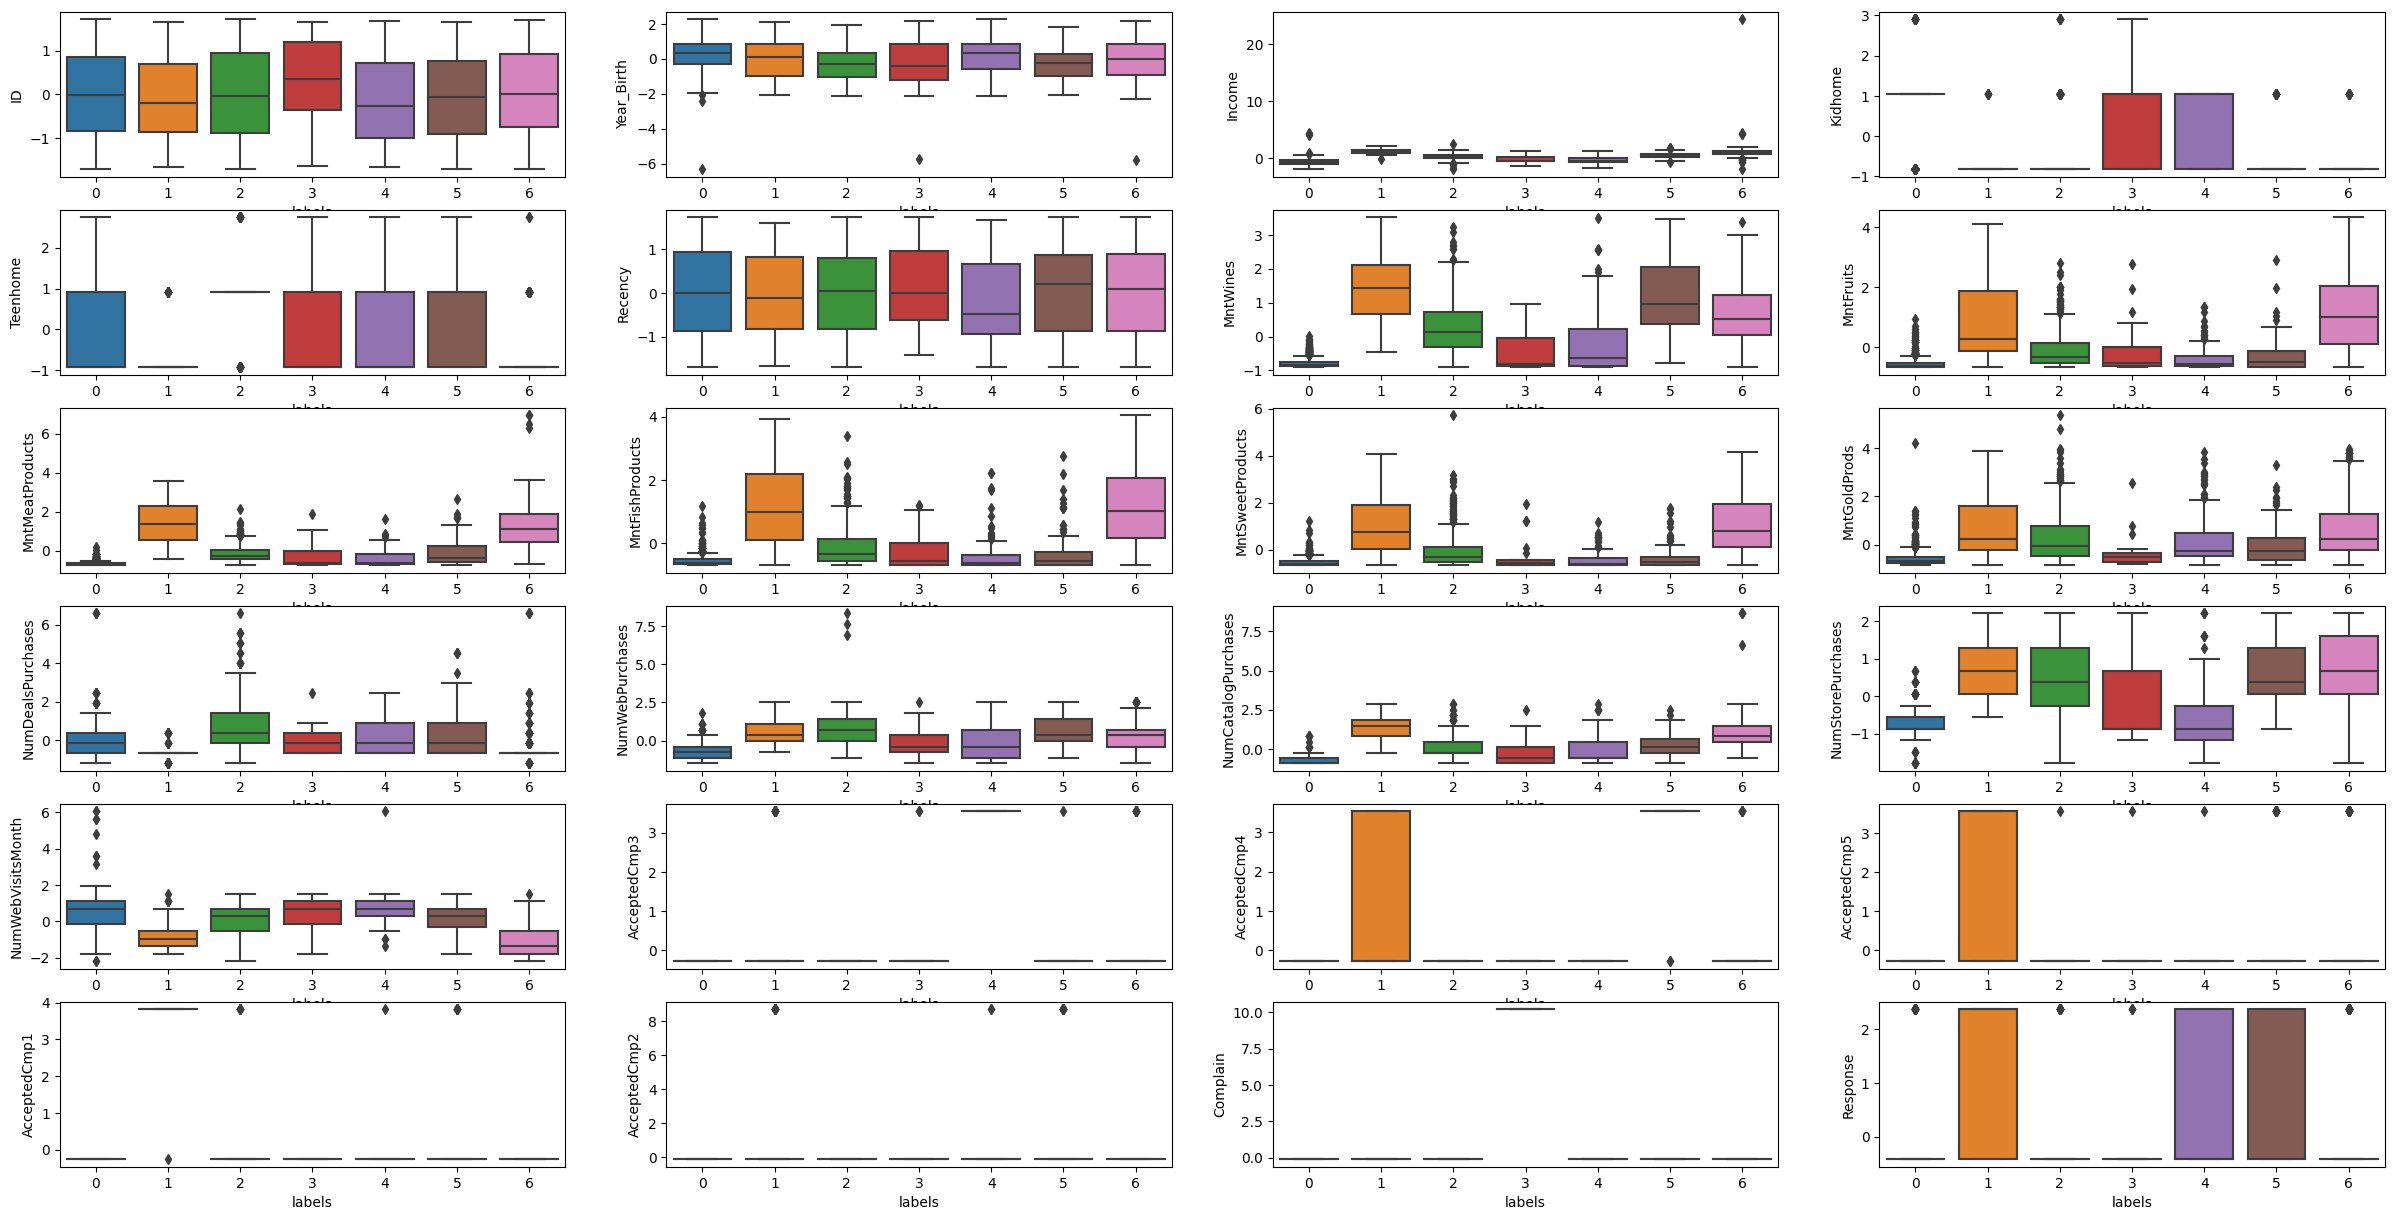

In [337]:
fig, ax= plt.subplots(6,4,figsize= (30,15))

for i in range(6):
  for j in range(4):
    sns.boxplot(df_kmeans, x= 'labels', y= num_cols[4*i+j], ax= ax[i][j])

### **Applying KMeans on the PCA data and visualize the clusters**

### **Cluster Profiling**

**Observations and Insights:**

### **Describe the characteristics of each cluster**

**Think About It:**
- Are the K-Means profiles providing any deep insights into customer purchasing behavior or which channels they are using?
- What is the next step to get more meaningful insights?

**Summary of each cluster:**

## **K-Medoids**

In [338]:
!pip install scikit-learn-extra


In [339]:
from sklearn_extra.cluster import KMedoids

In [340]:
model_kmedoids= KMedoids(n_clusters= 7, random_state= 0)
model_kmedoids.fit(pca_df)
model_kmedoids

KMedoids(n_clusters=7, random_state=0)

In [341]:
model_kmedoids.labels_

array([4, 2, 4, ..., 4, 5, 2])

In [342]:
model_kmedoids.predict(pca_df)

array([4, 2, 4, ..., 4, 5, 2])

In [343]:
pd.DataFrame(model_kmedoids.cluster_centers_)

0         1         2         3         4         5         6   \
0 -1.794048 -0.418779  0.033488  0.451085 -0.417354 -0.680397 -0.076523   
1 -2.727784 -1.173011  0.109081  0.327440 -0.230796 -0.942252 -0.081636   
2 -2.157964  0.407845 -0.096790 -0.184181 -0.365868  0.631745 -0.374530   
3 -1.393568 -0.479761 -0.248965 -0.474632 -0.440966 -0.421406  0.315550   
4  2.684024 -0.630863 -1.049639 -0.351307 -0.186242 -0.722585 -0.170939   
5 -0.123873  1.807687 -0.296957 -0.630942 -0.247998  0.782917 -0.150993   
6 -2.575890 -1.088825 -0.118700 -0.150544 -1.310613  0.259585  0.296538   

         7         8         9         10        11        12        13  \
0  0.149626 -0.088603  0.129923  0.043164  0.020202  0.347861  0.194040   
1  0.004267  0.155717 -0.247048 -0.138881  0.025171  0.029442  0.091673   
2  0.682037 -0.354159  0.106041  0.641815  0.428522  0.251166 -0.340451   
3 -0.473394 -0.319067  0.376521 -0.027795 -0.073566 -0.045658  0.237029   
4  0.130156  0.219258  1.456397 -0.202325 -0.295334 -0.533623  1.086859   
5 -0.046677  0.055432  0.510673 -0.601386  0.073893  0.324315  0.452042   
6 -0.133693 -0.203814 -0.208698 -0.041271 -0.284632 -0.025547  0.080706   

         14        15        16        17        18        19        20  \
0  0.265068  0.681367  0.493936  0.309099  0.007701 -0.180660  0.277255   
1  0.145669  0.543132 -0.100660  0.024886  0.097673  0.004281 -0.079665   
2 -0.111925 -0.120430  0.094446 -0.039476  0.105276  0.070606 -0.317793   
3  0.532864  0.491419  0.877631 -0.059559 -0.645298 -0.134150  0.200899   
4  0.579738  0.329141 -0.068536 -0.121422  0.096897  0.255474 -0.404324   
5  0.532475 -0.377777 -0.087614 -0.251136 -0.249116  0.085074  0.070108   
6  0.247524  0.134977  0.190722  0.063974 -0.149610 -0.112327  0.069163   

         21        22        23  
0  0.119403 -0.002540  0.064210  
1  0.142549 -0.007635  0.088887  
2 -0.089591  0.107371  0.113059  
3 -0.130133 -0.220108 -0.036156  
4 -0.251699  0.233587 -0.285142  
5 -0.083061 -0.337855 -0.030628  
6  0.109546 -0.022344  0.006475

In [344]:
pd.DataFrame(scaler.inverse_transform(pca.inverse_transform(model_kmedoids.cluster_centers_)), columns= num_cols)

ID  Year_Birth   Income       Kidhome      Teenhome  Recency  MntWines  \
0  5866.0      1974.0  48186.0  1.000000e+00  1.110223e-16     39.0      97.0   
1  7034.0      1978.0  25804.0  1.000000e+00 -1.110223e-16     34.0       8.0   
2  2245.0      1969.0  43641.0  1.000000e+00  1.000000e+00     50.0      57.0   
3  7409.0      1970.0  53187.0  1.000000e+00  5.551115e-16     66.0     211.0   
4  6320.0      1976.0  70893.0 -1.110223e-16  3.330669e-16     42.0     768.0   
5  3635.0      1962.0  52597.0 -1.665335e-16  1.000000e+00     69.0     492.0   
6  4432.0      1976.0  31615.0  1.000000e+00  3.330669e-16     82.0       2.0   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0  3.000000e+00             66.0             12.0      7.000000e+00   
1  7.000000e+00              9.0             13.0      6.000000e+00   
2  2.000000e+00             51.0              4.0      2.000000e+00   
3  2.000000e+00             30.0              7.0      7.000000e+00   
4  4.400000e+01            561.0             77.0      4.400000e+01   
5  2.486900e-14             37.0              7.0      4.618528e-14   
6  3.000000e+00             20.0              6.0      1.100000e+01   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0          34.0                3.0              4.0         1.000000e+00   
1          12.0                2.0              2.0         2.220446e-15   
2          23.0                3.0              2.0         1.000000e+00   
3          10.0                2.0              4.0         1.000000e+00   
4          14.0                1.0              6.0         6.000000e+00   
5          42.0                3.0              6.0         3.000000e+00   
6           9.0                2.0              2.0         2.664535e-15   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                4.0                7.0  1.942890e-16  2.775558e-17   
1                3.0                8.0  1.110223e-16  6.938894e-17   
2                4.0                6.0  2.775558e-17 -1.249001e-16   
3                6.0                5.0  1.526557e-16  4.163336e-17   
4               10.0                3.0 -2.220446e-16 -3.469447e-16   
5                8.0                5.0  1.249001e-16 -1.249001e-16   
6                3.0                7.0  1.110223e-16  5.551115e-17   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2      Complain      Response  
0 -4.163336e-17  1.387779e-16  1.734723e-17 -1.734723e-18  5.551115e-17  
1  2.081668e-16  2.914335e-16  4.510281e-17  3.122502e-17  1.942890e-16  
2 -1.942890e-16 -4.163336e-17 -6.938894e-18 -1.387779e-17  3.053113e-16  
3  0.000000e+00  1.387779e-16 -2.602085e-17  3.642919e-17 -2.775558e-17  
4  4.163336e-17 -2.498002e-16 -1.040834e-17 -4.163336e-17 -5.273559e-16  
5 -2.498002e-16 -1.942890e-16 -1.179612e-16 -6.071532e-17 -2.498002e-16  
6  1.110223e-16  1.526557e-16  2.602085e-17  1.214306e-17  1.665335e-16

In [345]:
df_kmedoids= scaled_df.copy()
df_kmedoids['labels']= model_kmedoids.labels_
df_kmedoids

ID  Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  \
0    -0.019809   -0.986443  0.234063 -0.823039 -0.928972  0.310532  0.978226   
1    -1.051009   -1.236801 -0.234559  1.039938  0.909066 -0.380509 -0.872024   
2    -0.445526   -0.318822  0.769478 -0.823039 -0.928972 -0.795134  0.358511   
3     0.182737    1.266777 -1.017239  1.039938 -0.928972 -0.795134 -0.872024   
4    -0.081373    1.016420  0.240221  1.039938 -0.928972  1.554407 -0.391671   
...        ...         ...       ...       ...       ...       ...       ...   
2211  1.625801   -0.151917  0.356642 -0.823039  0.909066 -0.104093  1.197646   
2212 -0.488620   -1.904422  0.467539  2.902916  0.909066  0.241428  0.299208   
2213  0.517646    1.016420  0.188091 -0.823039 -0.928972  1.450751  1.787710   
2214  0.814693   -1.069896  0.675388 -0.823039  0.909066 -1.417072  0.364441   
2215  1.174843   -1.236801  0.024705  1.039938  0.909066 -0.311405 -0.655568   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0      1.549429         1.690227         2.454568          1.484827   
1     -0.637328        -0.717986        -0.651038         -0.633880   
2      0.569159        -0.178368         1.340203         -0.146821   
3     -0.561922        -0.655551        -0.504892         -0.585174   
4      0.418348        -0.218505         0.152766         -0.000703   
...         ...              ...              ...               ...   
2211   0.418348         0.066913         0.079693          2.215416   
2212  -0.662463        -0.610954        -0.687574         -0.658233   
2213   0.544024         0.223001        -0.102990         -0.365998   
2214   0.091591         0.209622         0.773887          0.072356   
2215  -0.587058        -0.472705        -0.651038         -0.633880   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0         0.850031           0.351713         1.428553             2.504712   
1        -0.732867          -0.168231        -1.125881            -0.571082   
2        -0.037937          -0.688176         1.428553            -0.229327   
3        -0.752171          -0.168231        -0.760962            -0.912837   
4        -0.559135           1.391603         0.333796             0.112428   
...            ...                ...              ...                  ...   
2211      3.919308          -0.168231         1.793473             0.112428   
2212     -0.694260           2.431492         1.428553            -0.229327   
2213     -0.385402          -0.688176        -0.760962             0.112428   
2214      0.328832          -0.168231         0.698715             0.795937   
2215     -0.443313           0.351713        -0.396043            -0.571082   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0             -0.554143           0.693232     -0.281773     -0.282705   
1             -1.169518          -0.131574     -0.281773     -0.282705   
2              1.291982          -0.543978     -0.281773     -0.282705   
3             -0.554143           0.280829     -0.281773     -0.282705   
4              0.061232          -0.131574     -0.281773     -0.282705   
...                 ...                ...           ...           ...   
2211          -0.554143          -0.131574     -0.281773     -0.282705   
2212          -0.246455           0.693232     -0.281773     -0.282705   
2213           2.215044           0.280829     -0.281773      3.537258   
2214           1.291982          -0.956381     -0.281773     -0.282705   
2215          -0.554143           0.693232     -0.281773     -0.282705   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  labels  
0        -0.280839     -0.261661     -0.115153 -0.097812  2.377952       4  
1        -0.280839     -0.261661     -0.115153 -0.097812 -0.420530       2  
2        -0.280839     -0.261661     -0.115153 -0.097812 -0.420530       4  
3        -0.280839     -0.261661     -0.115153 -0.09

In [346]:
profile_kmedoids= df_kmedoids.groupby('labels').mean()
profile_kmedoids['count']= df_kmedoids.groupby('labels')['Income'].count().values
profile_kmedoids

ID  Year_Birth    Income   Kidhome  Teenhome   Recency  \
labels                                                                 
0      -0.014472    0.426115 -0.374206  0.724876 -0.455948 -0.535740   
1       0.516569    0.678148 -1.002130  0.676716 -0.639973 -0.658013   
2      -0.458218   -0.372146 -0.425301  0.741008  0.977531 -0.029642   
3       0.708725   -0.093061  0.138244  0.373188 -0.290496  0.473472   
4       0.066574   -0.007848  0.969375 -0.741219 -0.578131 -0.043860   
5      -0.108806   -0.532587  0.264248 -0.667791  0.916359  0.103905   
6      -0.244525    0.622463 -0.910741  0.754617 -0.755104  0.995815   

        MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
labels                                                          
0      -0.460240  -0.298743        -0.353770        -0.190704   
1      -0.856657  -0.549039        -0.681075        -0.572163   
2      -0.702756  -0.576975        -0.631617        -0.593040   
3      -0.399661  -0.224053        -0.424025        -0.287980   
4       0.916854   1.059931         1.267381         1.132278   
5       0.519888  -0.146794        -0.160158        -0.206220   
6      -0.840369  -0.520823        -0.649364        -0.559285   

        MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
labels                                                                       
0              -0.236712      0.134235           0.707264         0.392827   
1              -0.555614     -0.608790          -0.299035        -0.881454   
2              -0.560193     -0.545639           0.292121        -0.662674   
3              -0.226545     -0.382557          -0.266747        -0.223186   
4               1.055030      0.582780          -0.472118         0.473722   
5              -0.165037      0.372725           0.534313         0.734917   
6              -0.520233     -0.588960          -0.304073        -0.772468   

        NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
labels                                                              
0                 -0.405231          -0.303016           0.796333   
1                 -0.820413          -0.930528           0.789200   
2                 -0.669006          -0.687268           0.241834   
3                 -0.391211          -0.149291          -0.418086   
4                  1.133074           0.845003          -0.968920   
5                  0.170065           0.567329           0.060717   
6                 -0.765051          -0.878462           0.626356   

        AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
labels                                                                         
0           0.112567     -0.198441     -0.252592     -0.141562     -0.115153   
1           0.115756     -0.282705     -0.280839     -0.261661     -0.087482   
2          -0.040294     -0.184196     -0.280839     -0.238261     -0.089940   
3          -0.241450     -0.081654     -0.199963     -0.218678     -0.115153   
4           0.035298      0.156075      0.653604      0.559156      0.107802   
5          -0.038552      0.316059     -0.166506     -0.132030      0.094353   
6          -0.074707     -0.282705     -0.280839     -0.261661     -0.115153   

        Complain  Response  count  
labels                             
0      -0.021919  0.279090    136  
1       0.032018 -0.024518    318  
2       0.050060 -0.212047    349  
3       0.010835 -0.361615     95  
4      -0.045507  0.340544    592  
5       0.004584 -0.104035    504  
6      -0.004826 -0.319684    222

### **Visualize the clusters using PCA**

In [347]:
profile_kmedoids.style.highlight_max(color= 'orange')

In [348]:
profile_kmedoids.style.highlight_min(color= 'green')

### **Cluster Profiling**

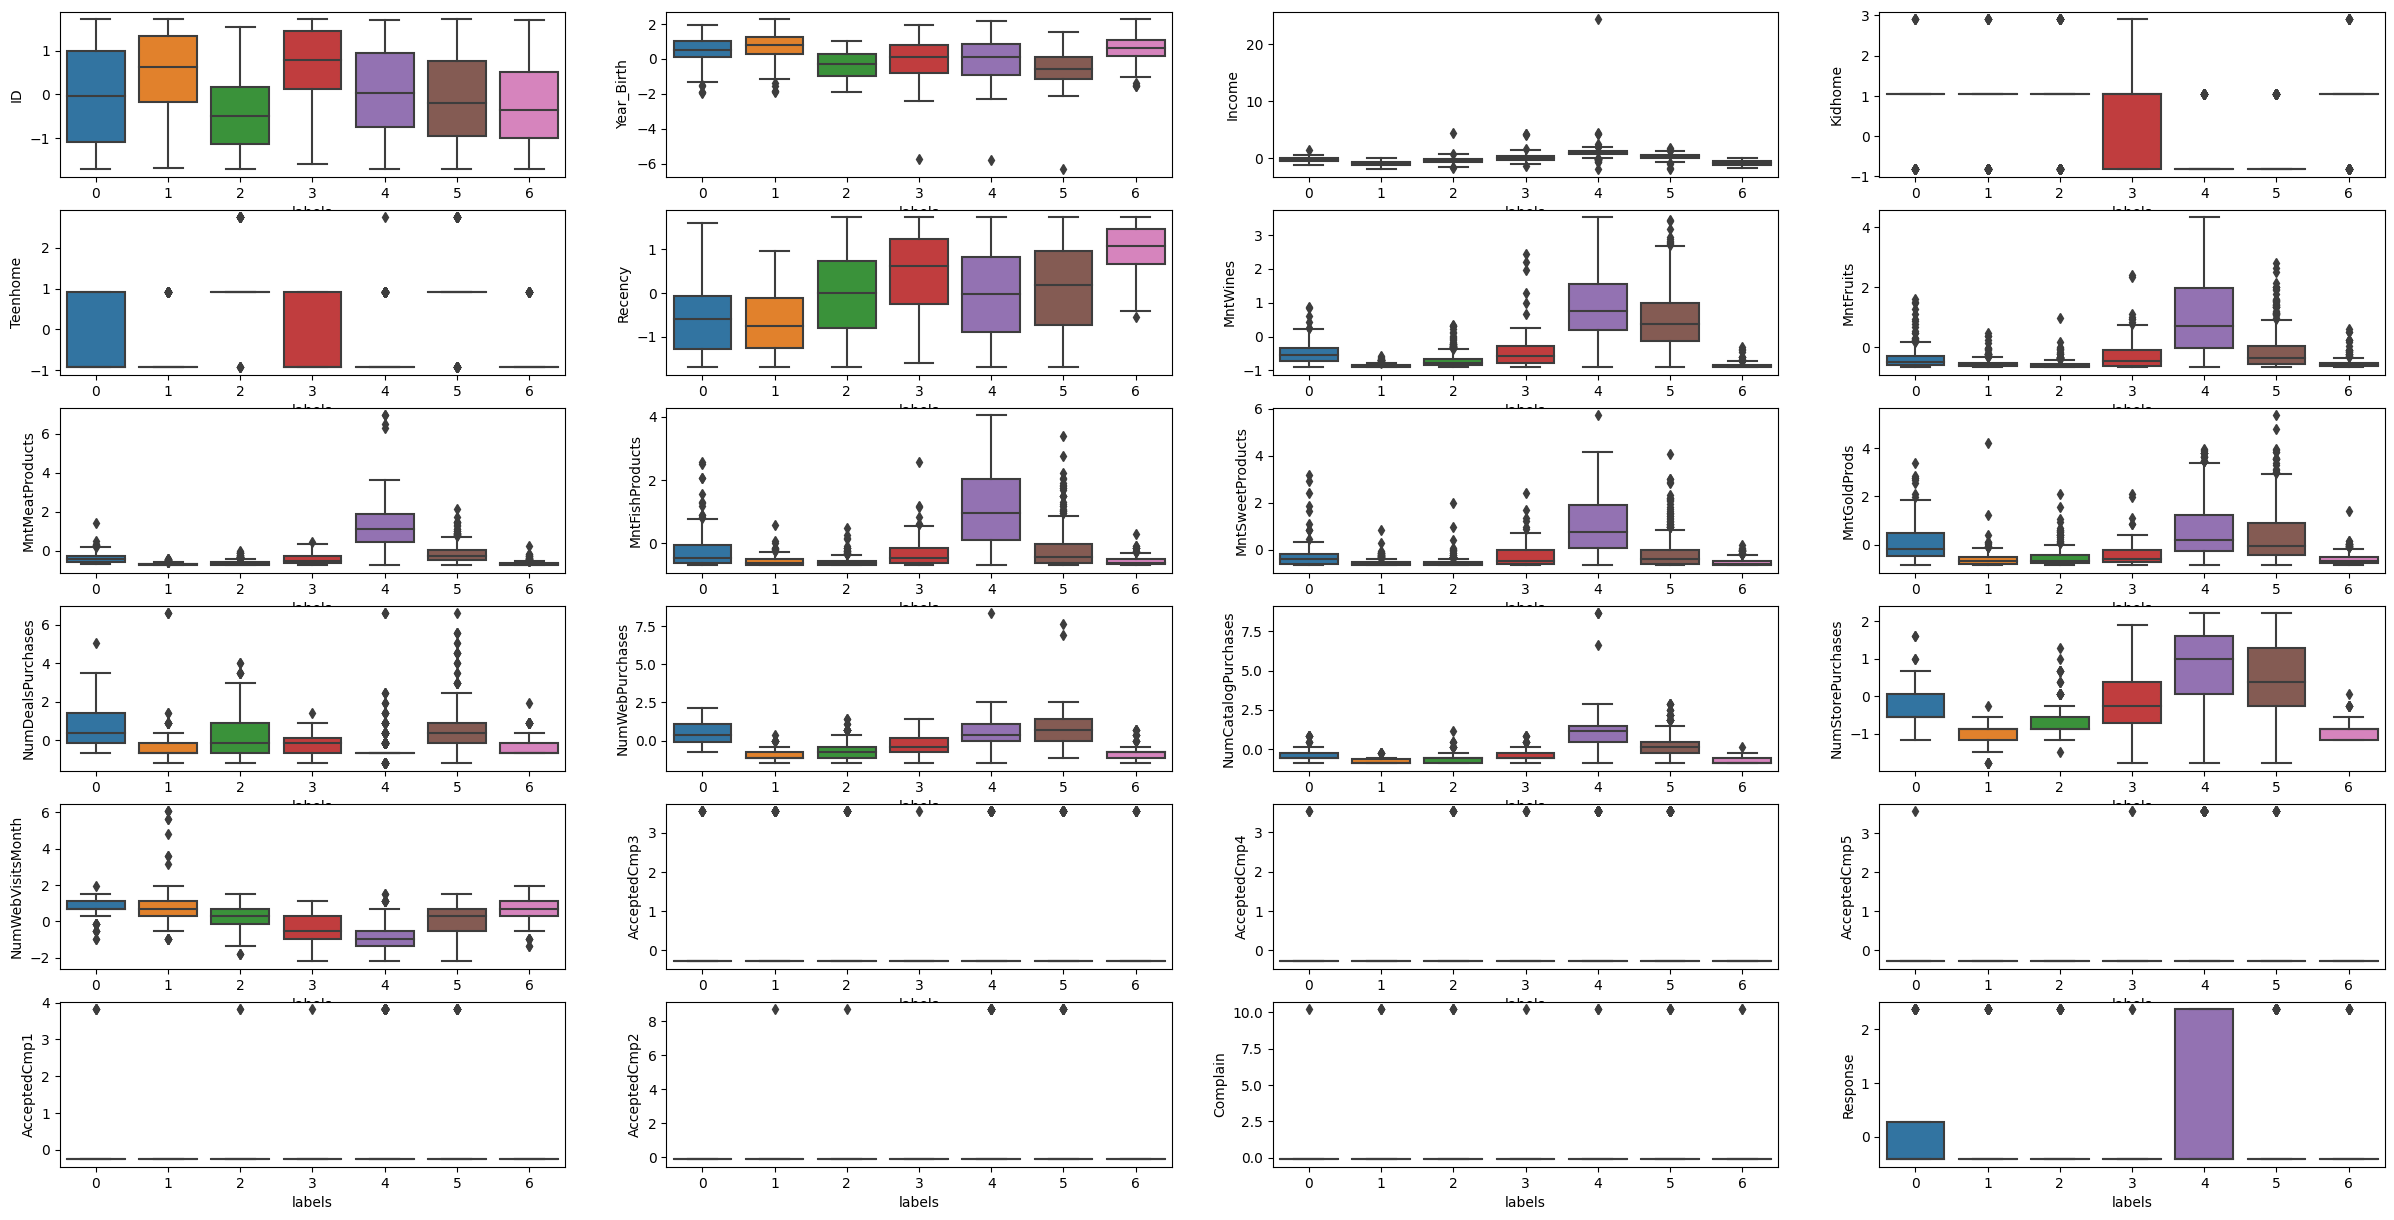

In [349]:
fig, ax= plt.subplots(6,4, figsize= (30,15))
for i in range(6):
  for j in range(4):
    sns.boxplot(df_kmedoids, x= 'labels', y= num_cols[4*i+j], ax= ax[i][j])

**Observations and Insights:**

### **Characteristics of each cluster**

**Summary for each cluster:**

**Observations and Insights:**

## **Hierarchical Clustering**

- Find the Cophenetic correlation for different distances with different linkage methods.
- Create the dendrograms for different linkages
- Explore different linkages with each distance metric

In [350]:
from sklearn.cluster import AgglomerativeClustering

In [351]:
model_agg= AgglomerativeClustering(n_clusters= 7, affinity= 'euclidean', linkage= 'complete')
model_agg.fit(pca_df)
model_agg

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=7)

In [352]:
model_agg.labels_

array([0, 0, 0, ..., 0, 0, 0])

<Axes: xlabel='0', ylabel='1'>

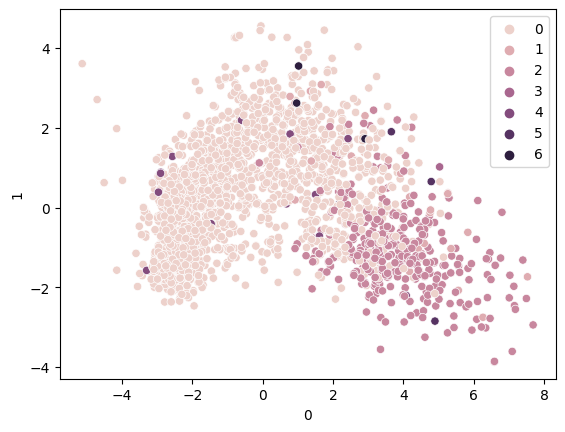

In [353]:
sns.scatterplot(pca_df, x= 0, y= 1, hue= model_agg.labels_)

In [354]:
from scipy.cluster.hierarchy import linkage, cophenet, dendrogram
from scipy.spatial.distance import pdist

In [355]:
z = linkage(tsne_df, method= 'complete', metric= 'euclidean')

In [356]:
pd.DataFrame(z, columns= ['node1', 'node2', 'distance', 'group_size'])

node1   node2    distance  group_size
0       50.0   719.0    0.000075         2.0
1      356.0   661.0    0.000112         2.0
2      645.0  1613.0    0.000266         2.0
3      748.0  1719.0    0.000704         2.0
4     1470.0  2212.0    0.000855         2.0
...      ...     ...         ...         ...
2210  4417.0  4422.0   57.641710       575.0
2211  4423.0  4425.0   67.804259       802.0
2212  4420.0  4427.0   86.312959      1138.0
2213  4424.0  4426.0   95.807705      1078.0
2214  4428.0  4429.0  118.074194      2216.0

[2215 rows x 4 columns]

In [357]:
c, c_dist= cophenet(z, pdist(tsne_df))
c

0.6629752053559825

In [358]:
np.corrcoef(c_dist, pdist(tsne_df))

array([[1.        , 0.66297521],
       [0.66297521, 1.        ]])

In [359]:
distance_= ['euclidean', 'chebyshev', 'mahalanobis']
linkage_= ['single', 'complete', 'average']
c_max= -float('inf')
for i in distance_:
  for j in linkage_:

    z= linkage(tsne_df, metric= i, method= j)
    c, c_dist= cophenet(z, pdist(tsne_df))

    print(c)

    if c > c_max:
      c_max= c
      idx_max= (i,j)


0.551574815578081
0.6629752053559825
0.7071776943339404
0.5301589501698359
0.6614741099835402
0.697811560377066
0.5447833901038445
0.6476446179484483
0.6939827207299266


In [360]:
c_max

0.7071776943339404

In [361]:
idx_max

('euclidean', 'average')

In [362]:
z= linkage(tsne_df, metric= idx_max[0], method= idx_max[1])

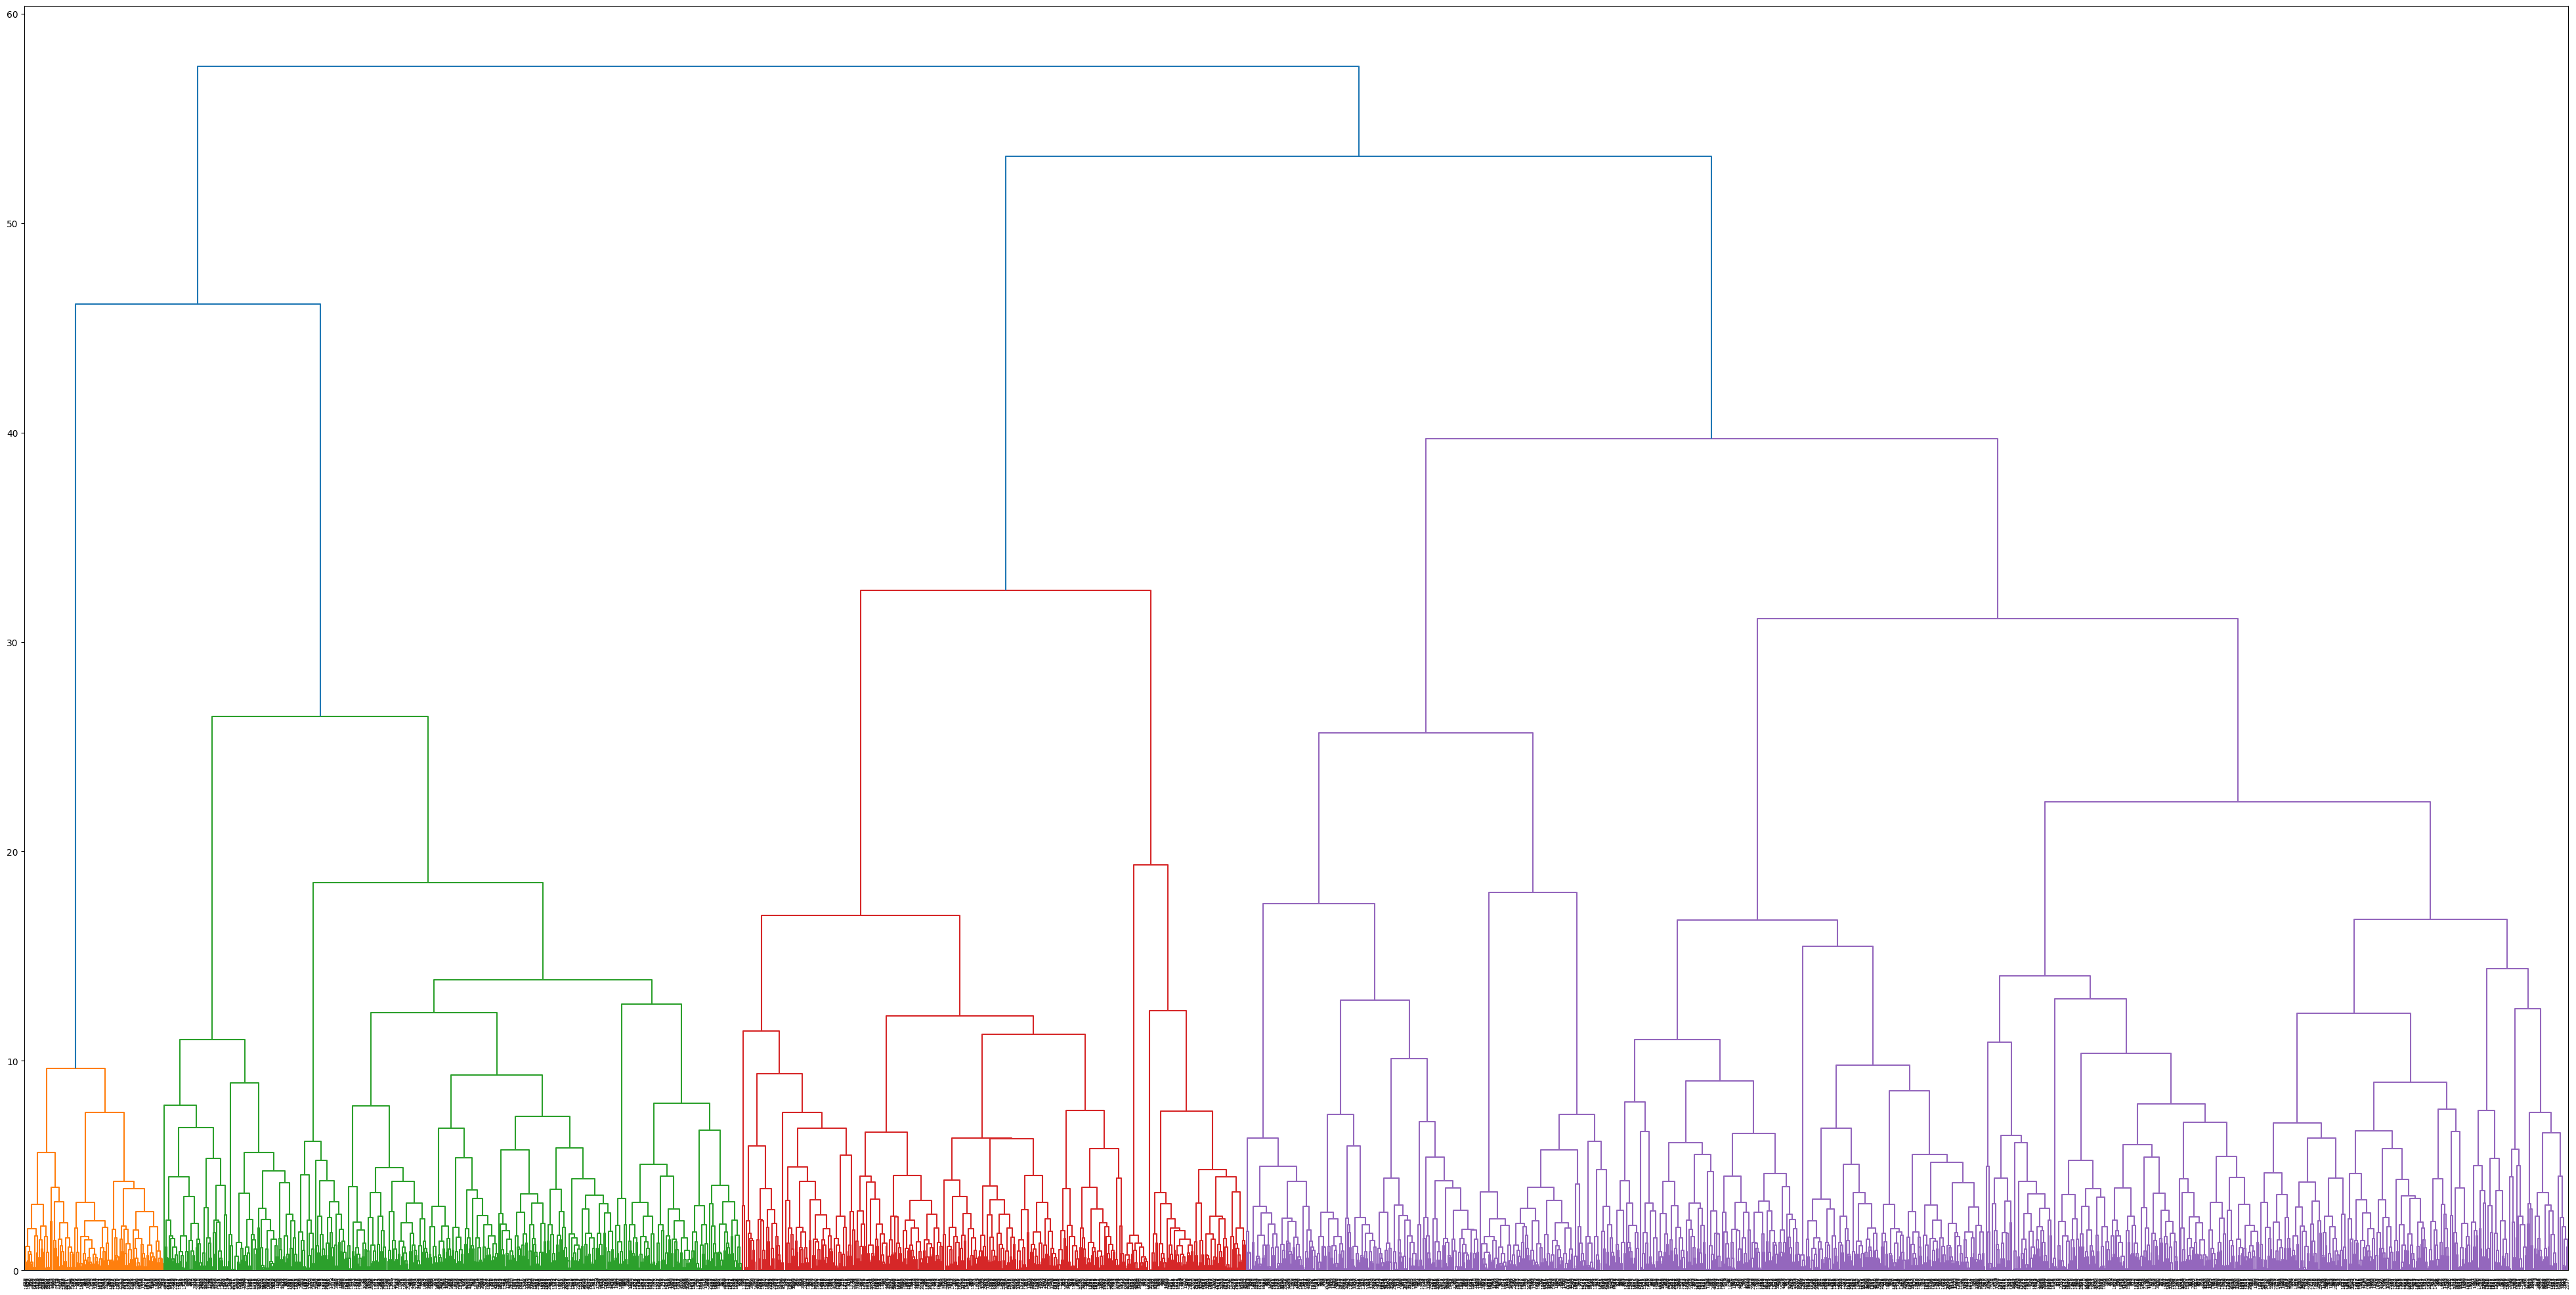

In [363]:
plt.figure(figsize= (50,25))
dendrogram(z);

In [364]:
#gmm
from sklearn.mixture import GaussianMixture

In [365]:
# train gmm model
model_gmm= GaussianMixture(n_components= 7, random_state= 0)
model_gmm.fit(pca_df)
model_gmm

GaussianMixture(n_components=7, random_state=0)

In [366]:
model_gmm.predict(pca_df)

array([3, 1, 3, ..., 2, 3, 1])

In [367]:
df_gmm= scaled_df.copy()
df_gmm['labels']= model_gmm.predict(pca_df)
df_gmm

ID  Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  \
0    -0.019809   -0.986443  0.234063 -0.823039 -0.928972  0.310532  0.978226   
1    -1.051009   -1.236801 -0.234559  1.039938  0.909066 -0.380509 -0.872024   
2    -0.445526   -0.318822  0.769478 -0.823039 -0.928972 -0.795134  0.358511   
3     0.182737    1.266777 -1.017239  1.039938 -0.928972 -0.795134 -0.872024   
4    -0.081373    1.016420  0.240221  1.039938 -0.928972  1.554407 -0.391671   
...        ...         ...       ...       ...       ...       ...       ...   
2211  1.625801   -0.151917  0.356642 -0.823039  0.909066 -0.104093  1.197646   
2212 -0.488620   -1.904422  0.467539  2.902916  0.909066  0.241428  0.299208   
2213  0.517646    1.016420  0.188091 -0.823039 -0.928972  1.450751  1.787710   
2214  0.814693   -1.069896  0.675388 -0.823039  0.909066 -1.417072  0.364441   
2215  1.174843   -1.236801  0.024705  1.039938  0.909066 -0.311405 -0.655568   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0      1.549429         1.690227         2.454568          1.484827   
1     -0.637328        -0.717986        -0.651038         -0.633880   
2      0.569159        -0.178368         1.340203         -0.146821   
3     -0.561922        -0.655551        -0.504892         -0.585174   
4      0.418348        -0.218505         0.152766         -0.000703   
...         ...              ...              ...               ...   
2211   0.418348         0.066913         0.079693          2.215416   
2212  -0.662463        -0.610954        -0.687574         -0.658233   
2213   0.544024         0.223001        -0.102990         -0.365998   
2214   0.091591         0.209622         0.773887          0.072356   
2215  -0.587058        -0.472705        -0.651038         -0.633880   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0         0.850031           0.351713         1.428553             2.504712   
1        -0.732867          -0.168231        -1.125881            -0.571082   
2        -0.037937          -0.688176         1.428553            -0.229327   
3        -0.752171          -0.168231        -0.760962            -0.912837   
4        -0.559135           1.391603         0.333796             0.112428   
...            ...                ...              ...                  ...   
2211      3.919308          -0.168231         1.793473             0.112428   
2212     -0.694260           2.431492         1.428553            -0.229327   
2213     -0.385402          -0.688176        -0.760962             0.112428   
2214      0.328832          -0.168231         0.698715             0.795937   
2215     -0.443313           0.351713        -0.396043            -0.571082   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0             -0.554143           0.693232     -0.281773     -0.282705   
1             -1.169518          -0.131574     -0.281773     -0.282705   
2              1.291982          -0.543978     -0.281773     -0.282705   
3             -0.554143           0.280829     -0.281773     -0.282705   
4              0.061232          -0.131574     -0.281773     -0.282705   
...                 ...                ...           ...           ...   
2211          -0.554143          -0.131574     -0.281773     -0.282705   
2212          -0.246455           0.693232     -0.281773     -0.282705   
2213           2.215044           0.280829     -0.281773      3.537258   
2214           1.291982          -0.956381     -0.281773     -0.282705   
2215          -0.554143           0.693232     -0.281773     -0.282705   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  labels  
0        -0.280839     -0.261661     -0.115153 -0.097812  2.377952       3  
1        -0.280839     -0.261661     -0.115153 -0.097812 -0.420530       1  
2        -0.280839     -0.261661     -0.115153 -0.097812 -0.420530       3  
3        -0.280839     -0.261661     -0.115153 -0.09

In [368]:
profile_gmm= df_gmm.groupby('labels').mean()
profile_gmm['count']= df_gmm.groupby('labels')['MntWines'].count().values
profile_gmm

ID  Year_Birth    Income   Kidhome  Teenhome   Recency  \
labels                                                                 
0      -0.110447   -0.120262  0.719736 -0.694558 -0.105024 -0.065966   
1      -0.030762   -0.166322 -0.330172  0.330233  0.567716  0.043206   
2      -0.104599   -0.191125  0.250211 -0.132453  0.338640 -0.051222   
3       0.047431   -0.178204  0.796571 -0.805364 -0.158182 -0.004174   
4       0.063955    0.741067 -1.017740  0.763258 -0.928972 -0.059107   
5       0.005951    0.046426  1.199426 -0.720958 -0.702365  0.004297   
6       0.042314   -0.650436  0.386328 -0.136679  0.231894  0.077760   

        MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
labels                                                          
0       1.835357  -0.089555         0.284206         0.044416   
1      -0.493703  -0.477211        -0.531259        -0.505153   
2       0.739046   0.140778         0.026641         0.171192   
3       0.537331   0.897824         0.928176         0.930433   
4      -0.869088  -0.570322        -0.687563        -0.575206   
5       1.628344   0.822748         1.412965         0.746109   
6       0.532284   0.208668         0.372869         0.432559   

        MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
labels                                                                       
0               0.089151      0.439995          -0.293735         0.308629   
1              -0.489531     -0.306877           0.245249        -0.222272   
2               0.085792      0.392152           0.761842         0.662538   
3               0.852852      0.584468          -0.228415         0.509677   
4              -0.556602     -0.631762          -0.394742        -0.894645   
5               0.978085      0.631476          -0.659686         0.508757   
6               0.561337      0.238410           0.050693         1.121253   

        NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
labels                                                              
0                  0.878430           0.740266          -0.032029   
1                 -0.514530          -0.392973           0.294576   
2                  0.303928           0.573160           0.508362   
3                  0.934066           0.818482          -0.843694   
4                 -0.819785          -0.927328           0.596256   
5                  1.135352           0.744045          -1.038297   
6                  0.247331           0.271755          -0.240102   

        AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
labels                                                                         
0           0.510792      2.615198      1.838664      1.428018      8.684112   
1          -0.067435     -0.282705     -0.280839     -0.261661     -0.115153   
2           0.461256      0.985128     -0.280839     -0.261661     -0.115153   
3          -0.223621     -0.282705     -0.280839      0.172247     -0.115153   
4           0.069061     -0.282705     -0.280839     -0.261661     -0.115153   
5           0.242984      0.947009      3.560760      1.360508     -0.115153   
6          -0.281773      1.526751     -0.280839      1.457662     -0.115153   

        Complain  Response  count  
labels                             
0      -0.097812  1.412958     29  
1      -0.097812 -0.183992    840  
2      -0.097812  0.098154    232  
3      -0.097812 -0.032884    527  
4       0.081026 -0.122672    404  
5      -0.027117  1.074549    146  
6       3.433228  0.021336     38

In [369]:
profile_gmm.style.highlight_max(axis=0, color= 'orange')

In [370]:
profile_gmm.style.highlight_min(axis=0, color='green')

**Think about it:**

- Can we clearly decide the number of clusters based on where to cut the dendrogram horizontally?
- What is the next step in obtaining number of clusters based on the dendrogram?
- Are there any distinct clusters in any of the dendrograms?

### **Visualize the clusters using PCA**

### **Cluster Profiling**

**Observations and Insights:**

### **Characteristics of each cluster**

**Summary of each cluster:**

## **DBSCAN**

DBSCAN is a very powerful algorithm for finding high-density clusters, but the problem is determining the best set of hyperparameters to use with it. It includes two hyperparameters, `eps`, and `min samples`.

Since it is an unsupervised algorithm, you have no control over it, unlike a supervised learning algorithm, which allows you to test your algorithm on a validation set. The approach we can follow is basically trying out a bunch of different combinations of values and finding the silhouette score for each of them.

In [371]:
from sklearn.cluster import DBSCAN

In [372]:
model_dbs= DBSCAN(eps= 1.5, min_samples= 10)
model_dbs.fit(tsne_df)
model_dbs

DBSCAN(eps=1.5, min_samples=10)

### **Apply DBSCAN for the best hyperparameter and visualize the clusters from PCA**

In [373]:
np.unique(model_dbs.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38])

<Axes: >

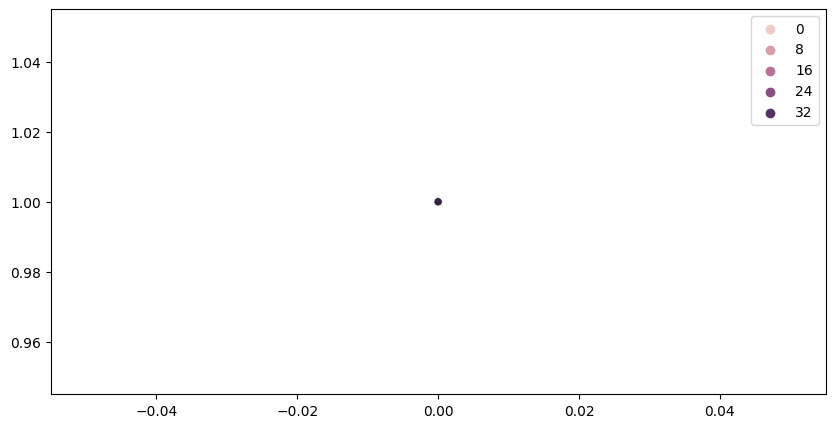

In [374]:
plt.figure(figsize= (10,5))
sns.scatterplot(tsne_df, x= 0, y= 1, hue= model_dbs.labels_)

In [375]:
from sklearn.metrics import silhouette_score

eps_= [0.5, 1, 2, 3, 4, 5]
min_s= [3, 5, 10, 15, 20]

max_score= -float('inf')

for i in eps_:
  for j in min_s:
    model= DBSCAN(eps= i, min_samples= j).fit(tsne_df)
    print(np.unique(model.labels_))

    if len(np.unique(model.labels_)) > 1:

      score= silhouette_score(tsne_df, model.labels_)
      print(score)
      if score > max_score:
        max_score= score
        idx_max= [i,j]

[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140]
-0.549507
[-1  0  1  2  3  4]
-0.48580042
[-1]
[-1]
[-1]
[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
 

In [376]:
idx_max

[5, 20]

In [377]:
max_score

0.39450344

<Axes: >

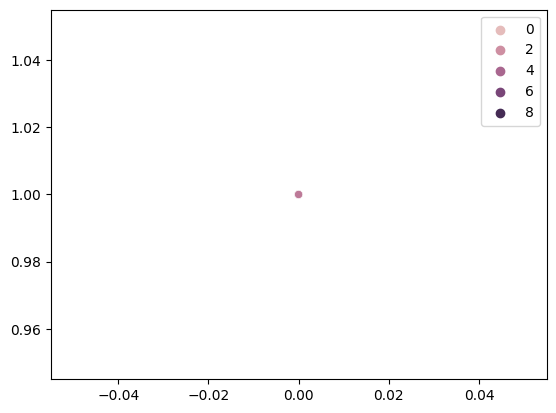

In [378]:
model_dbs= DBSCAN(eps= 5, min_samples= 20).fit(tsne_df)
sns.scatterplot(tsne_df, x= 0, y= 1, hue= model_dbs.labels_)

In [379]:
df_dbs= scaled_df.copy()
df_dbs['labels']= model_dbs.labels_
df_dbs

ID  Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  \
0    -0.019809   -0.986443  0.234063 -0.823039 -0.928972  0.310532  0.978226   
1    -1.051009   -1.236801 -0.234559  1.039938  0.909066 -0.380509 -0.872024   
2    -0.445526   -0.318822  0.769478 -0.823039 -0.928972 -0.795134  0.358511   
3     0.182737    1.266777 -1.017239  1.039938 -0.928972 -0.795134 -0.872024   
4    -0.081373    1.016420  0.240221  1.039938 -0.928972  1.554407 -0.391671   
...        ...         ...       ...       ...       ...       ...       ...   
2211  1.625801   -0.151917  0.356642 -0.823039  0.909066 -0.104093  1.197646   
2212 -0.488620   -1.904422  0.467539  2.902916  0.909066  0.241428  0.299208   
2213  0.517646    1.016420  0.188091 -0.823039 -0.928972  1.450751  1.787710   
2214  0.814693   -1.069896  0.675388 -0.823039  0.909066 -1.417072  0.364441   
2215  1.174843   -1.236801  0.024705  1.039938  0.909066 -0.311405 -0.655568   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0      1.549429         1.690227         2.454568          1.484827   
1     -0.637328        -0.717986        -0.651038         -0.633880   
2      0.569159        -0.178368         1.340203         -0.146821   
3     -0.561922        -0.655551        -0.504892         -0.585174   
4      0.418348        -0.218505         0.152766         -0.000703   
...         ...              ...              ...               ...   
2211   0.418348         0.066913         0.079693          2.215416   
2212  -0.662463        -0.610954        -0.687574         -0.658233   
2213   0.544024         0.223001        -0.102990         -0.365998   
2214   0.091591         0.209622         0.773887          0.072356   
2215  -0.587058        -0.472705        -0.651038         -0.633880   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0         0.850031           0.351713         1.428553             2.504712   
1        -0.732867          -0.168231        -1.125881            -0.571082   
2        -0.037937          -0.688176         1.428553            -0.229327   
3        -0.752171          -0.168231        -0.760962            -0.912837   
4        -0.559135           1.391603         0.333796             0.112428   
...            ...                ...              ...                  ...   
2211      3.919308          -0.168231         1.793473             0.112428   
2212     -0.694260           2.431492         1.428553            -0.229327   
2213     -0.385402          -0.688176        -0.760962             0.112428   
2214      0.328832          -0.168231         0.698715             0.795937   
2215     -0.443313           0.351713        -0.396043            -0.571082   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0             -0.554143           0.693232     -0.281773     -0.282705   
1             -1.169518          -0.131574     -0.281773     -0.282705   
2              1.291982          -0.543978     -0.281773     -0.282705   
3             -0.554143           0.280829     -0.281773     -0.282705   
4              0.061232          -0.131574     -0.281773     -0.282705   
...                 ...                ...           ...           ...   
2211          -0.554143          -0.131574     -0.281773     -0.282705   
2212          -0.246455           0.693232     -0.281773     -0.282705   
2213           2.215044           0.280829     -0.281773      3.537258   
2214           1.291982          -0.956381     -0.281773     -0.282705   
2215          -0.554143           0.693232     -0.281773     -0.282705   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  labels  
0        -0.280839     -0.261661     -0.115153 -0.097812  2.377952       0  
1        -0.280839     -0.261661     -0.115153 -0.097812 -0.420530       1  
2        -0.280839     -0.261661     -0.115153 -0.097812 -0.420530       0  
3        -0.280839     -0.261661     -0.115153 -0.09

**Observations and Insights:**

In [380]:
df_dbs[df_dbs['labels'] == 1]

ID  Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  \
1    -1.051009   -1.236801 -0.234559  1.039938  0.909066 -0.380509 -0.872024   
12    0.797763   -1.403706  0.282379  1.039938  0.909066  0.137772 -0.213762   
15    1.276732    0.932967 -0.413124  1.039938  0.909066  0.068668 -0.747488   
25   -0.980210    0.599157  0.044174  1.039938  0.909066 -1.555280 -0.391671   
33    1.585169   -1.487159 -0.113570  1.039938  0.909066  0.206876 -0.786035   
...        ...         ...       ...       ...       ...       ...       ...   
2192 -1.507200   -1.236801 -0.613502  1.039938  0.909066  1.347094 -0.892780   
2200 -1.274487   -0.485727 -0.742439  1.039938  2.747104 -0.553270 -0.842372   
2202 -0.258370   -0.068464  0.250592  1.039938  0.909066  0.206876  0.186532   
2203 -0.341790    0.849514  0.458122  1.039938  0.909066  1.312542  0.450430   
2212 -0.488620   -1.904422  0.467539  2.902916  0.909066  0.241428  0.299208   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
1     -0.637328        -0.717986        -0.651038         -0.633880   
12    -0.612193        -0.508382        -0.632770         -0.536468   
15    -0.536787        -0.660011        -0.651038         -0.341645   
25    -0.561922        -0.610954        -0.632770         -0.512115   
33    -0.662463        -0.660011        -0.651038         -0.633880   
...         ...              ...              ...               ...   
2192  -0.612193        -0.722446        -0.687574         -0.658233   
2200  -0.360841        -0.691228        -0.687574         -0.585174   
2202  -0.059220        -0.441488         0.006620         -0.658233   
2203  -0.536787        -0.272021        -0.413550         -0.244233   
2212  -0.662463        -0.610954        -0.687574         -0.658233   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
1        -0.732867          -0.168231        -1.125881            -0.571082   
12       -0.578438           0.351713         0.698715            -0.571082   
15       -0.771475           0.351713        -0.396043            -0.912837   
25       -0.057240           0.871658         0.333796            -0.571082   
33       -0.790778          -0.688176        -0.760962            -0.912837   
...            ...                ...              ...                  ...   
2192     -0.752171          -0.688176        -1.125881            -0.912837   
2200     -0.790778           0.351713        -0.760962            -0.912837   
2202      0.850031           1.911548         1.428553            -0.229327   
2203      0.174403           2.951437         2.523311            -0.571082   
2212     -0.694260           2.431492         1.428553            -0.229327   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
1             -1.169518          -0.131574     -0.281773     -0.282705   
12            -0.246455           0.280829     -0.281773     -0.282705   
15            -0.861830           1.105635     -0.281773     -0.282705   
25            -0.554143           0.693232     -0.281773     -0.282705   
33            -0.861830           0.693232     -0.281773     -0.282705   
...                 ...                ...           ...           ...   
2192          -1.169518           0.280829     -0.281773     -0.282705   
2200          -0.554143          -0.543978     -0.281773     -0.282705   
2202           0.061232           0.693232     -0.281773     -0.282705   
2203           0.061232           1.105635     -0.281773     -0.282705   
2212          -0.246455           0.693232     -0.281773     -0.282705   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  labels  
1        -0.280839     -0.261661     -0.115153 -0.097812  -0.42053       1  
12       -0.280839     -0.261661     -0.115153 -0.097812  -0.42053       1  
15       -0.280839     -0.261661     -0.115153 -0.097812  -0.42053       1  
25       -0.280839     -0.261661     -0.115153 -0.09

In [381]:
profile_dbs= df_dbs.groupby('labels').mean()
profile_dbs['count']= df_dbs.groupby('labels')['Income'].count().values
profile_dbs

ID  Year_Birth    Income   Kidhome  Teenhome   Recency  \
labels                                                                 
-1      0.404925    0.162024  1.805478 -0.202047 -0.141242 -0.049797   
 0      0.028002   -0.258613  0.421328 -0.740748  0.288869 -0.001496   
 1     -0.033299   -0.282728 -0.368075  1.205663  0.999276  0.091561   
 2      0.030309    0.819109 -0.844000  1.102519 -0.928972  0.116880   
 3     -0.081111    0.100476 -0.635332  0.767307  0.012462 -0.784600   
 4      0.053190    0.072233 -0.893594 -0.823039 -0.898591  0.035543   
 5     -0.016100   -0.061887  1.140491 -0.740444 -0.675450  0.022371   
 6     -0.152391   -0.346640  0.299665 -0.471144  0.541458  0.052543   
 7     -0.158105    0.159823 -0.396463  0.239320 -0.002358 -0.190616   
 8      0.349180   -0.310874 -0.278335  0.418946  0.033810  0.139417   
 9     -0.110447   -0.120262  0.719736 -0.694558 -0.105024 -0.065966   

        MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
labels                                                          
-1     -0.106170   0.235221         0.012548        -0.096900   
 0      0.307234   0.422172         0.371942         0.410741   
 1     -0.620059  -0.535322        -0.575113        -0.542493   
 2     -0.792632  -0.495935        -0.615368        -0.510981   
 3     -0.555802  -0.458317        -0.488477        -0.506674   
 4     -0.763269  -0.385145        -0.574393        -0.390149   
 5      1.460346   0.810233         1.406523         0.964129   
 6      0.828354  -0.220922        -0.146506        -0.245685   
 7     -0.141324  -0.324281        -0.360993        -0.328097   
 8     -0.403531  -0.054432        -0.243139        -0.216949   
 9      1.835357  -0.089555         0.284206         0.044416   

        MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
labels                                                                       
-1             -0.011140     -0.495708           0.475510        -0.222272   
 0              0.372360      0.337075          -0.066794         0.393795   
 1             -0.501508     -0.472091           0.600521        -0.492310   
 2             -0.499719     -0.529256          -0.137330        -0.628950   
 3             -0.437275     -0.295004           0.706798        -0.120128   
 4             -0.341846     -0.317759          -0.597938        -0.643343   
 5              0.972455      0.688945          -0.629266         0.545916   
 6             -0.233409     -0.178853           0.461480         0.617622   
 7             -0.357545      0.224976           0.089593         0.029194   
 8             -0.231477     -0.318299           0.005084        -0.170140   
 9              0.089151      0.439995          -0.293735         0.308629   

        NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
labels                                                              
-1                -0.375794          -0.495536           0.928891   
 0                 0.444957           0.575806          -0.464533   
 1                -0.660190          -0.591896           0.365586   
 2                -0.753882          -0.766423           0.629293   
 3                -0.521069          -0.595418           0.949727   
 4                -0.607800          -0.660943           0.284237   
 5                 1.144426           0.743298          -0.988886   
 6                 0.097238           0.577463           0.216677   
 7                 0.053115          -0.505828           0.512593   
 8                -0.213053          -0.173197           0.202276   
 9                 0.878430           0.740266          -0.032029   

        AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
labels                                                                         
-1          0.630305     -0.282705     -0.280839      0.127233     -0.115153   
 0         -0.267672     -0.282705     -0.276125     -0.261661     -0.115153  

In [382]:
profile_dbs.style.highlight_max(color= 'orange')

In [383]:
profile_dbs.style.highlight_min(color= 'green')

In [384]:
models_= [model_kmeans, model_kmedoids, model_agg, model_gmm, model_dbs]
for i in models_:
  try:
    score= silhouette_score(tsne_df, i.predict(tsne_df))
  except:
    score= silhouette_score(tsne_df, i.labels_)
  print(f"the {i} model's score is {score}")

the KMeans(n_clusters=7) model's score is 0.18763118982315063
the KMedoids(n_clusters=7, random_state=0) model's score is 0.12130576372146606
the AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=7) model's score is -0.409482479095459


AttributeError: ignored

**Think about it:**

- Changing the eps and min sample values will result in different DBSCAN results? Can we try more value for eps and min_sample?

### **Characteristics of each cluster**

**Summary of each cluster:**

## **Gaussian Mixture Model**

**Observations and Insights:**

### **Visualize the clusters using PCA**

### **Cluster Profiling**

**Observations and Insights:**


### **Characteristics of each cluster**


**Summary of each cluster:**

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?